# **Trabajo Práctico N°1** Organización de Datos 75.06 2do cuatrimestre 2022
## GRUPO 6 - Integrantes: Sofía Javes, Gastón Frenkel, Tomás Emanuel, Valentina Adelsflügel, Víctor Zacarías



El objetivo principal del trabajo será aplicar técnicas de análisis exploratorio, preprocesamiento
de datos, agrupamiento, clasificación y regresión sobre el set de datos provisto por la empresa Properati correspondiente a
anuncios de propiedades en venta de la República Argentina publicados durante el año 2021.

# Análisis Exploratorio y Preprocesamiento de Datos

#### Descripción y clasificación de las variables
Para clasificar cada variable se utilizan los siguientes tipos:
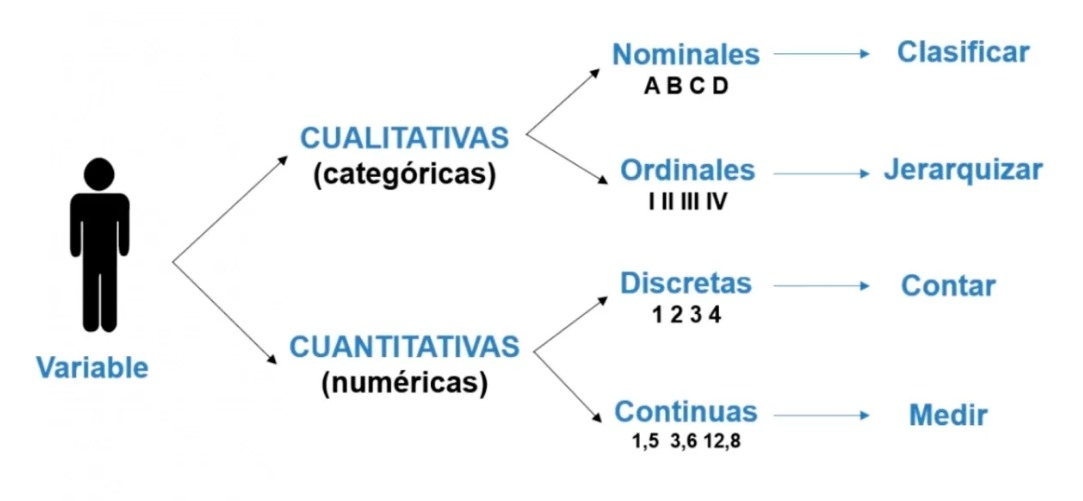
- id: Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja. **(Cualitativa nominal)**
- start_date: Fecha de alta del aviso. **(Cualitativa ordinal)**
- end_date: Fecha de baja del aviso. **(Cualitativa ordinal)**
- created_on: Fecha de alta de la primera versión del aviso. **(Cualitativa ordinal)**
- place: Campos referidos a la ubicación de la propiedad o del desarrollo.**(Cualitativa nominal)**
- lat: Latitud. **(Cuantitativa continua)**
- lon: Longitud. **(Cuantitativa continua)**
- l1: Nivel administrativo 1: país. **(Cualitativa nominal)**
- l2: Nivel administrativo 2: usualmente provincia. **(Cualitiva nominal)**
- l3: Nivel administrativo 3: usualmente ciudad. **(Cualitativa nominal)**
- l4: Nivel administrativo 4: usualmente barrio. **(Cualitativa nominal)**
- property: Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto). **(Cualitativa nominal)**
- operation: Tipo de operación (Venta, Alquiler). **(Cualitativa nominal)**
- type: Tipo de propiedad (Casa, Departamento, PH....). **(Cualitativa nominal)**
- rooms: Cantidad de ambientes (útil en Argentina). **(Cuantitativa discreta)**
- bedrooms: Cantidad de dormitorios (útil en el resto de los países). **(Cuantitativa discreta)**
- surface_total: Superficie total en m². **(Cuantitativa continua)**
- surface_covered: Superficie cubierta en m². **(Cuantitativa continua)**
- price: Precio publicado en el anuncio. **(Cuantitativa continua)**
- currency: Moneda del precio publicado. **(Cualitativa nominal)**
- title: Título del anuncio. **(Cualitativa nominal)**

Importación de bibliotecas a utilizar.

En caso de no tener instaladas las bibliotecas ejecutar:

In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.chained_assignment = None

Se carga el dataset en un dataframe de Pandas y se realiza una copia para no trabajar sobre el original.

In [3]:
ds_properati_original = pd.read_csv('properati_argentina_2021.csv')    

FileNotFoundError: [Errno 2] No such file or directory: 'properati_argentina_2021.csv'

Procedemos a cambiar los nombres de las columnas *place_l2*, *place_l3* y *place_l4* de modo que sean más descriptivas.

In [ ]:
ds_properati = ds_properati_original.copy()    
ds_properati.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

In [ ]:
ds_properati.rename(columns = {'place_l2':'provincia', 'place_l3':'ciudad', 'place_l4':'barrio'}, inplace = True)
ds_properati.head(4)

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   

    longitud   provincia ciudad barrio place_l5  place_l6 operation  \
0 -68.105443     Neuquén    NaN    NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo    NaN    NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos    NaN    NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado    NaN    NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   

     property_title  
0    Casa - Capital  
1     Casa - Malvín  
2    Casa - Uruguay  
3  Casa - El Chorro

Se realiza un análisis introductorio incluyendo el tamaño del dataset y los tipos de dato de cada columna.


In [ ]:
ds_properati.shape

(460154, 20)

In [ ]:
ds_properati.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
provincia                    object
ciudad                       object
barrio                       object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

Seleccionamos los datos que se van a utilizar:
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD). Por lo tanto, analizamos qué datos tenemos en cada una de esas variables.

In [ ]:
ds_properati.operation.unique().tolist()

['Venta', 'Alquiler', 'Alquiler temporal']

Vemos que las operaciones no son sólo Venta, por lo que eliminamos las filas que contengan Alquiler y Alquiler temporal ya que no nos interesan en este trabajo. 

In [ ]:
ds_properati.operation.isna().sum()

0

Como no hay nans eliminamos todo lo que no sea Venta directamente.

In [ ]:
ds_properati = ds_properati.drop(ds_properati.index[(ds_properati["operation"] != "Venta")])

Como se puede apreciar, ahora solo quedan entradas de propiedades en venta:

In [ ]:
ds_properati.operation.unique().tolist()

['Venta']

Ahora las filas que contengan datos diferentes a Casa, PH o Departamento.

In [ ]:
ds_properati.property_type.isna().sum()

0

Como no hay nans eliminamos todo lo que no sea Casa, Departamento, PH directamente.

In [ ]:
ds_properati = ds_properati.drop(ds_properati.index[~ds_properati.property_type.isin(["Casa","Departamento","PH"])])

Y por ultimo, eliminamos las filas que contengan un Tipo de cambio diferente a USD

In [ ]:
ds_properati.property_currency.isna().sum()

10476

Tenemos 10476 NaNs, como serán tratados más adelante no se eliminan por el momento.

In [ ]:
ds_properati = ds_properati.drop(ds_properati.index[~ds_properati.property_currency.isin(["USD",np.nan])])

Por ultimo, eliminamos las filas de las propiedades que no sean de Capital Federal.

In [ ]:
ds_properati.provincia.isna().sum()

0

Como no tenemos NaNs eliminamos todo lo que no sea Capital Federal.

In [ ]:
ds_properati = ds_properati.drop(ds_properati.index[ds_properati["provincia"] != "Capital Federal"])

Podemos ver que todas las columnas elegidas quedan con los valores deseados.

In [ ]:
display(ds_properati.operation.unique().tolist())
display(ds_properati.property_type.unique().tolist())
display(ds_properati.property_currency.unique().tolist())
display(ds_properati.provincia.unique().tolist())


['Venta']

['Casa', 'Departamento', 'PH']

['USD', nan]

['Capital Federal']

In [ ]:
ds_properati.shape

(95495, 20)

Vemos que redujimos el tamaño del DataSet ampliamente.

Dado que comenzaremos con las técnicas de eliminación e imputación de datos separaremos el dataset en un conjunto 80-20 train-test

In [ ]:
ds_properati, test = train_test_split(ds_properati, test_size=0.2, random_state=0)

#### Variables Cuantitativas
Estas pueden ser:
- Cuantitativas discretas: Estas variables toman valores numéricos siendo que entre dos valores consecutivos de las mismas no existen valores intermedios. Pueden tomar un conjunto a lo sumo numerable de valores, vinculándose generalmente al proceso de contar. 
- Cuantitativas continuas: Estas variables también toman valores numéricos, pero entre dos valores de la variable existen infinitos valores intermedios, asociándose generalmente al proceso de medir. 

En el caso de nuestro data set las variables cuantitativas, como ya se indicó mas arriba, son:
latitud, longitud, property_surface_total, property_surface_covered, price. Para trabajar sólo sobre estas se crea un nuevo data frame y se calculan medidas de resumen: media, mediana, q1, q3, moda.

In [ ]:
df_cuantitativas = ds_properati[["latitud", "longitud", "property_surface_total", "property_surface_covered", "property_price", "property_bedrooms", "property_rooms"]]
dic_cuanti = []
for i in df_cuantitativas.columns:
  dic_cuanti.append({'variable': i, 'media': df_cuantitativas[i].mean(), 
                                    'moda': df_cuantitativas[i].mode().to_list(),
                                    'mediana': df_cuantitativas[i].median(),
                                    'rango': df_cuantitativas[i].max() - df_cuantitativas[i].min(),
                                    'primer cuartil': df_cuantitativas[i].quantile(0.25),
                                    'tercer cuartil': df_cuantitativas[i].quantile(0.75)})

pd.DataFrame(dic_cuanti)

variable          media           moda        mediana  \
0                   latitud     -34.591630  [-34.5412501]     -34.595726   
1                  longitud     -58.450484  [-58.4729664]     -58.439089   
2    property_surface_total     110.586602         [50.0]      65.000000   
3  property_surface_covered      90.417974         [40.0]      58.000000   
4            property_price  226619.533558     [110000.0]  143000.000000   
5         property_bedrooms       2.018515          [1.0]       2.000000   
6            property_rooms       2.826898          [3.0]       3.000000   

          rango  primer cuartil  tercer cuartil  
0  2.956880e+01      -34.615870      -34.577373  
1  1.733786e+01      -58.466529      -58.408870  
2  1.369900e+05       45.000000      105.000000  
3  2.169990e+05       40.000000       89.000000  
4  2.140000e+07    95000.000000   238000.000000  
5  7.100000e+01        1.000000        3.000000  
6  3.900000e+01        2.000000        4.000000

A continuación se muestran gráficos de las distribuciones de estas variables cuantitativas. Los resultados observados pueden estar afectados por los valores faltantes que más adelante se tratarán.

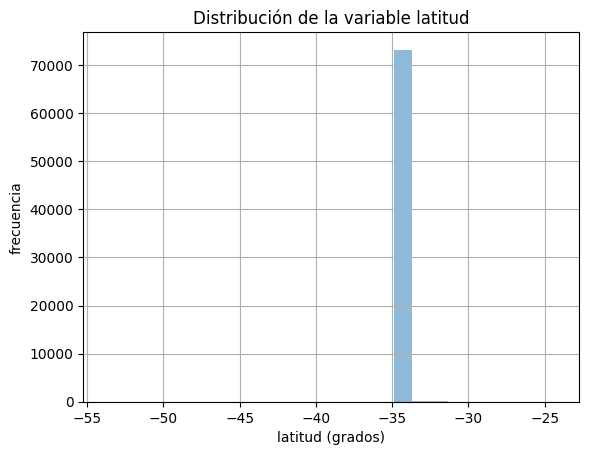

In [ ]:
plt.title('Distribución de la variable latitud')
plt.hist(ds_properati['latitud'], bins = 25 , alpha = 0.5) 
plt.xlabel("latitud (grados)") 
plt.ylabel("frecuencia")
plt.grid(True)
plt.show()

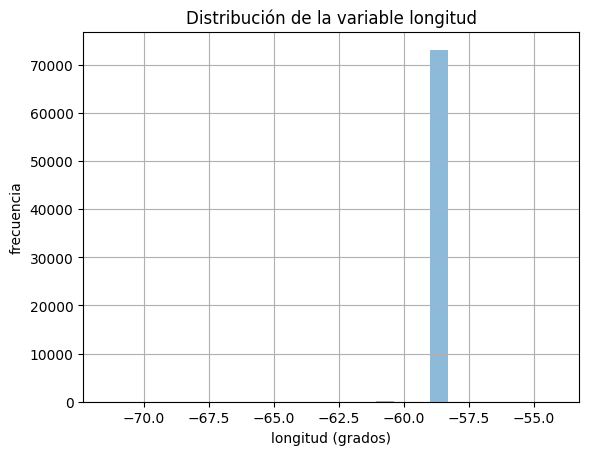

In [ ]:
plt.title('Distribución de la variable longitud')
plt.hist(ds_properati['longitud'], bins = 25 , alpha = 0.5) 
plt.xlabel("longitud (grados)") 
plt.ylabel("frecuencia")
plt.grid(True)
plt.show()

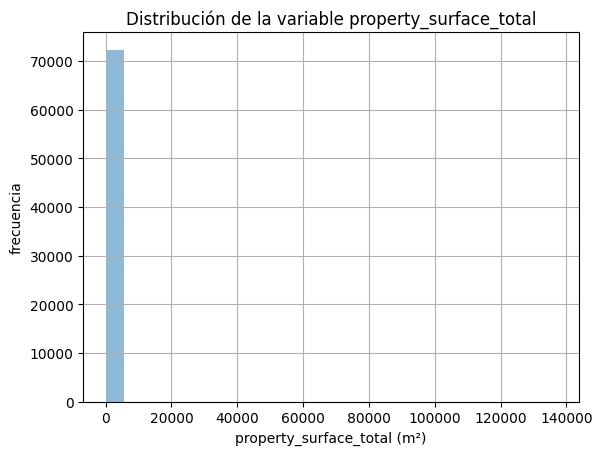

In [ ]:
plt.title('Distribución de la variable property_surface_total')
plt.hist(ds_properati['property_surface_total'], bins = 25 , alpha = 0.5) 
plt.xlabel("property_surface_total (m²)")
plt.ylabel("frecuencia")
plt.grid(True)
plt.show()

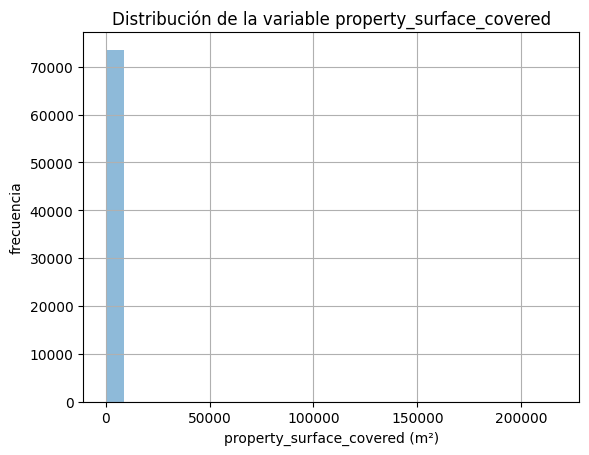

In [ ]:
plt.title('Distribución de la variable property_surface_covered')
plt.hist(ds_properati['property_surface_covered'], bins = 25 , alpha = 0.5) 
plt.xlabel("property_surface_covered (m²)") 
plt.ylabel("frecuencia")
plt.grid(True)
plt.show()

Hasta acá notamos una distribución uniforme de estas variables.

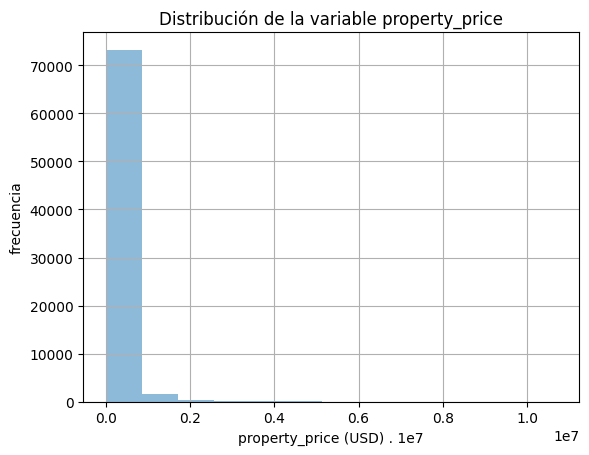

In [ ]:
plt.title('Distribución de la variable property_price')
plt.hist(ds_properati['property_price'], bins = 25 , alpha = 0.5) 

scale_factor = 0.5
xmin, xmax = plt.xlim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)

plt.xlabel("property_price (USD) . 1e7") 
plt.ylabel("frecuencia")
plt.grid(True)
plt.show()


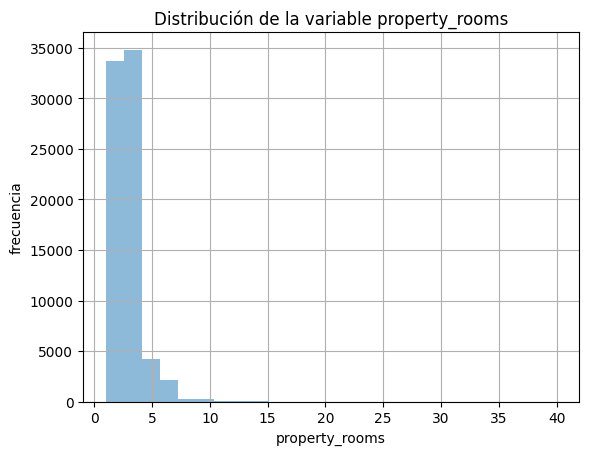

In [ ]:
plt.title('Distribución de la variable property_rooms')
plt.hist(ds_properati['property_rooms'], bins = 25 , alpha = 0.5) 

plt.xlabel("property_rooms") 
plt.ylabel("frecuencia")
plt.grid(True)
plt.show()

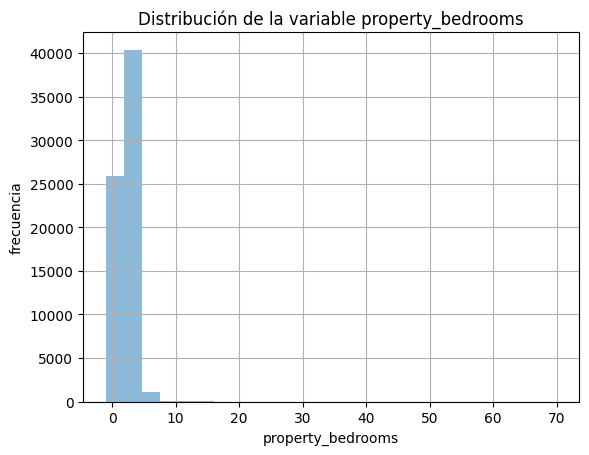

In [ ]:
plt.title('Distribución de la variable property_bedrooms')
plt.hist(ds_properati['property_bedrooms'], bins = 25 , alpha = 0.5) 

plt.xlabel("property_bedrooms") 
plt.ylabel("frecuencia")
plt.grid(True)
plt.show()

#### Variables Cualitativas
Estas pueden ser: 

- Nominales: Se diferencian de las Ordinales ya que no necesariamente llevan un orden. Dentro de esta clasificacion podrían llegar a ser de texto o numéricas:
    - Texto: Estas podrían ser, por ejemplo el color de ojos de una persona, o algo no necesariamente ordenable.
    - Numéricas: Pueden ser por ejemplo ids, o numeros de telefono.
- Ordinales: Una variable cualitativa ordinal podría ser aquella que tenga una escala establecida, con valores ordenados. 
    - Texto: Esta puede ser por ejemplo las medallas de un torneo (Oro,plata,bronce), que mantienen un orden siendo la mejor Oro y la peor la de Bronce.
    - Numéricas.

En el principio del tp ya definimos todos las variables cualitativas que encontramos.
Ahora mostramos los valores posibles de cada variable cualitativa, exeptuando las que tienen solamente un valor.


In [ ]:
df_cual_nominal = ds_properati[["property_type","ciudad","property_title"]]
dic_cual_nominal = []
for cual in df_cual_nominal.columns:
  dic_cual_nominal.append({"variable": cual, "tipos" : ds_properati[cual].unique().tolist()})
pd.DataFrame(dic_cual_nominal)


variable                                              tipos
0   property_type                           [Departamento, PH, Casa]
1          ciudad  [Balvanera, Almagro, Villa Devoto, Caballito, ...
2  property_title  [Ambiente divisible con cochera  DOS ULTIMAS U...

Calculamos la frecuencia de cada categoria segun los valores tomados.

Para cada categoria tenemos:

In [ ]:
ds_agrupado_PT = ds_properati["property_type"].value_counts()
ds_agrupado_PL_3 = ds_properati["ciudad"].value_counts()
ds_agrupado_CO = ds_properati["created_on"].value_counts() 

Con sus respectivas tablas con la frecuencia:

In [ ]:
display(ds_agrupado_PT)

Departamento    65496
PH               7442
Casa             3458
Name: property_type, dtype: int64

Para ciudad:

In [ ]:
display(ds_agrupado_PL_3)

Palermo                 11687
Belgrano                 7222
Caballito                5738
Recoleta                 5109
Villa Urquiza            3819
Almagro                  3269
Nuñez                    2865
Flores                   2558
Villa Crespo             2548
Barrio Norte             2415
Balvanera                2039
Villa Devoto             1579
Colegiales               1572
Villa del Parque         1506
Saavedra                 1453
Puerto Madero            1242
San Telmo                1102
San Cristobal            1048
San Nicolás              1043
Retiro                   1042
Barracas                  999
Floresta                  994
Boedo                     976
Monserrat                 892
Parque Chacabuco          883
Villa Pueyrredón          795
Coghlan                   767
Chacarita                 590
Mataderos                 590
Villa Luro                589
Liniers                   547
Villa Ortuzar             519
Parque Patricios          515
Villa Luga

Por fecha de creación:

In [ ]:
display(ds_agrupado_CO)

2021-12-16    3791
2021-02-13    1687
2021-11-03     838
2021-04-10     663
2021-08-03     652
              ... 
2021-12-26      14
2021-01-02      11
2021-10-24       8
2021-12-19       7
2021-11-27       1
Name: created_on, Length: 365, dtype: int64

##### Conclusiones

Se puede observar que para la categoría de ciudad la zona más frecuente de venta de propiedades es en Palermo, además de esto se puede ver que el tipo de propiedad más frecuente en venta es el de Departamento. Para el caso de los ambientes, se puede ver que el más frecuente son 3 y para las habitaciones es 1. No le vemos mucho sentido mostrar todos los tipos de "property title" ya que no hay valores frecuentes. También se ve que para la categoría de bedrooms, el valor más frecuente es 1. Por último, se puede ver que se crearon publicaciones todos los días del año siendo el más frecuente el 16 de Diciembre con 17417 publicaciones.
 Se podría hacer un gráfico con los resultados más frecuentes (para mejor visualización). Si hay muchos tipos lo truncamos en los 10 valores más frecuentes para poder ver mejor.


<AxesSubplot:title={'center':'Frecuencia de valores de la variable ciudad'}, ylabel='frecuencia'>

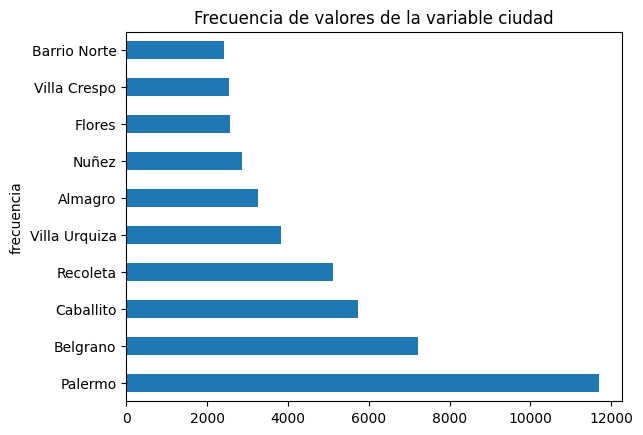

In [ ]:
ds_agrupado_PL_3[:10].plot(kind = "barh", title="Frecuencia de valores de la variable ciudad", xlabel="frecuencia",ylabel="zona")

<AxesSubplot:title={'center':'Frecuencia de valores de la variable Property Title'}, ylabel='frecuencia'>

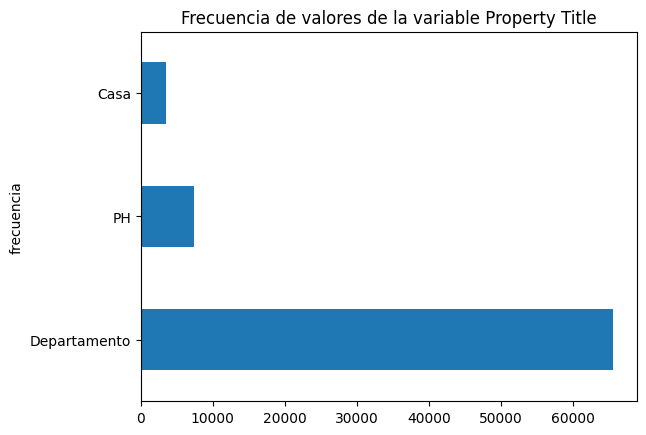

In [ ]:
ds_agrupado_PT.plot(kind = "barh", title="Frecuencia de valores de la variable Property Title", xlabel="frecuencia",ylabel="Tipo de Venta")

<AxesSubplot:title={'center':'Frecuencia de valores de la variable Property Rooms'}, ylabel='frecuencia'>

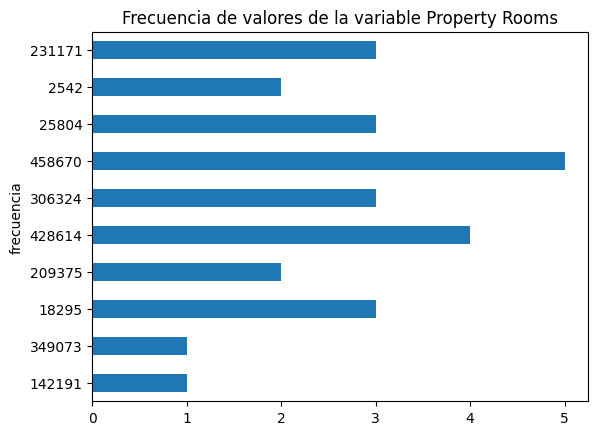

In [ ]:
(ds_properati["property_rooms"])[:10].plot(kind = "barh", title="Frecuencia de valores de la variable Property Rooms", xlabel="frecuencia",ylabel="Cantidad de ambientes")

<AxesSubplot:title={'center':'Frecuencia de valores de la variable created_on'}, ylabel='frecuencia'>

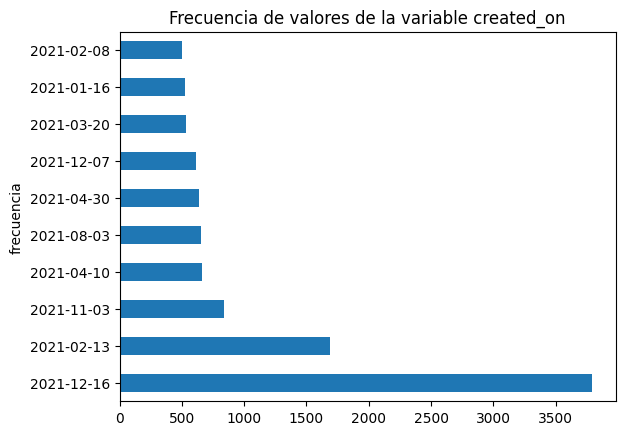

In [ ]:
ds_agrupado_CO[:10].plot(kind = "barh", title="Frecuencia de valores de la variable created_on", xlabel="frecuencia",ylabel="Fecha de Publicacion")

<AxesSubplot:title={'center':'Frecuencia de valores de la variable property_bedrooms'}, ylabel='frecuencia'>

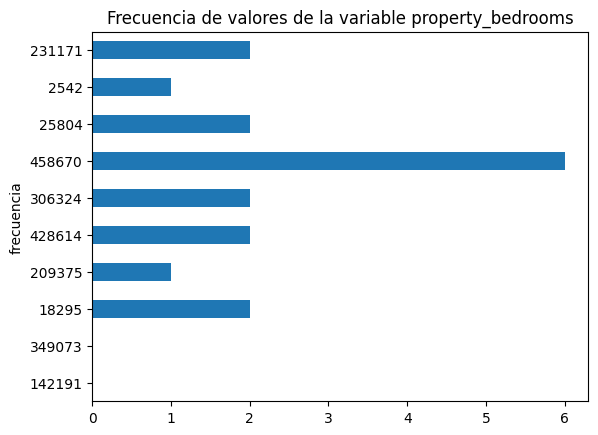

In [ ]:
(ds_properati["property_bedrooms"])[:10].plot(kind = "barh", title="Frecuencia de valores de la variable property_bedrooms", xlabel="frecuencia",ylabel="cant de habitaciones")

#### Variables irrelevantes en el análisis

Se descartan las columnas de **id** (que no son de utilidad para el análisis ya que no aportan información alguna sobre las propiedades), **property_title** (porque solamente es una forma que tiene el vendedor de identificar su anuncio, que suele contener la información que ya figura en las otras variables). También sacamos la fecha de inicio (porque es igual a la fecha de creación) y de fin de la publicación.

In [ ]:
ds_properati.drop(["id", "property_title","start_date","end_date"], axis=1, inplace=True)
ds_properati.reset_index(drop=True,inplace=True)
ds_properati.head()

created_on    latitud   longitud        provincia        ciudad barrio  \
0  2021-03-10 -34.611523 -58.410394  Capital Federal     Balvanera    NaN   
1  2021-04-16 -34.621782 -58.424452  Capital Federal       Almagro    NaN   
2  2021-08-28 -34.592425 -58.515042  Capital Federal  Villa Devoto    NaN   
3  2021-11-29 -34.607836 -58.446965  Capital Federal     Caballito    NaN   
4  2021-12-16 -34.625914 -58.433323  Capital Federal     Caballito    NaN   

  place_l5  place_l6 operation property_type  property_rooms  \
0      NaN       NaN     Venta  Departamento             1.0   
1      NaN       NaN     Venta  Departamento             1.0   
2      NaN       NaN     Venta            PH             3.0   
3      NaN       NaN     Venta  Departamento             2.0   
4      NaN       NaN     Venta  Departamento             4.0   

   property_bedrooms  property_surface_total  property_surface_covered  \
0                NaN                    49.0                      45.0   
1                NaN                    44.0                      40.0   
2                2.0                    76.0                      66.0   
3                1.0                    56.0                      50.0   
4                2.0                   124.0                     124.0   

   property_price property_currency  
0         79000.0               USD  
1         99000.0               USD  
2        160000.0               USD  
3        153000.0               USD  
4        345000.0               USD

#### Covarianza y Correlación

Tanto la covarianza como la correlación son medidas de asociación lineal entre dos variables.
La Covarianza indica la dirección/sentido de esa asociación lineal y la Correlación mide tanto la fuerza como el sentido de dicha asociación lineal.

El valor (magnitud) de la covarianza depende las unidades en que se miden las variables.
Si las escalas de medida de las variables fueran muy diferentes, la variabilidad estaría dominada por las variables con mayores magnitudes.

La Correlación se define como la covarianza de los datos estandarizados, por lo que evita el problema de las diferencias en las escalas de medición. Se obtiene dividiendo la covarianza de dos variables por el producto de sus desvíos estándar.

Los valores del coeficiente de correlación van de -1 a 1. Cuanto más cerca esté de 1 (lineal perfecta positiva) o -1 (lineal perfecta negativa), más estrechamente relacionadas estarán las dos variables. El signo positivo significa la dirección de la correlación, es decir, si una de las variables aumenta, se supone que la otra también aumentará. Al contar con una muestra poblacional se calcula la correlación mediante un estimador muestral que es el de Pearson.



In [ ]:
matriz_cov = ds_properati.cov()
matriz_cov

latitud     longitud  place_l6  property_rooms  \
latitud                     0.033887    -0.010043       NaN        0.001675   
longitud                   -0.010043     0.087702       NaN       -0.004007   
place_l6                         NaN          NaN       NaN             NaN   
property_rooms              0.001675    -0.004007       NaN        2.066393   
property_bedrooms           0.000733    -0.003564       NaN        1.324680   
property_surface_total      5.039955    -4.788471       NaN       97.112752   
property_surface_covered    0.441367    -0.423259       NaN       79.523533   
property_price            953.191980  2134.476575       NaN   214959.300942   

                          property_bedrooms  property_surface_total  \
latitud                            0.000733            5.039955e+00   
longitud                          -0.003564           -4.788471e+00   
place_l6                                NaN                     NaN   
property_rooms                     1.324680            9.711275e+01   
property_bedrooms                  1.303732            7.757166e+01   
property_surface_total            77.571663            1.126211e+06   
property_surface_covered          60.069419            5.573565e+05   
property_price                156040.944484            2.484536e+07   

                          property_surface_covered  property_price  
latitud                               4.413669e-01    9.531920e+02  
longitud                             -4.232593e-01    2.134477e+03  
place_l6                                       NaN             NaN  
property_rooms                        7.952353e+01    2.149593e+05  
property_bedrooms                     6.006942e+01    1.560409e+05  
property_surface_total                5.573565e+05    2.484536e+07  
property_surface_covered              1.246669e+06    1.798064e+07  
property_price                        1.798064e+07    1.037980e+11

In [ ]:
matriz_corr=ds_properati.corr()
matriz_corr

latitud  longitud  place_l6  property_rooms  \
latitud                   1.000000 -0.184220       NaN        0.007003   
longitud                 -0.184220  1.000000       NaN       -0.010326   
place_l6                       NaN       NaN       NaN             NaN   
property_rooms            0.007003 -0.010326       NaN        1.000000   
property_bedrooms         0.003429 -0.010283       NaN        0.866759   
property_surface_total    0.025822 -0.015365       NaN        0.065167   
property_surface_covered  0.002067 -0.001232       NaN        0.071129   
property_price            0.016698  0.023725       NaN        0.486802   

                          property_bedrooms  property_surface_total  \
latitud                            0.003429                0.025822   
longitud                          -0.010283               -0.015365   
place_l6                                NaN                     NaN   
property_rooms                     0.866759                0.065167   
property_bedrooms                  1.000000                0.065159   
property_surface_total             0.065159                1.000000   
property_surface_covered           0.069904                0.642898   
property_price                     0.423188                0.076842   

                          property_surface_covered  property_price  
latitud                                   0.002067        0.016698  
longitud                                 -0.001232        0.023725  
place_l6                                       NaN             NaN  
property_rooms                            0.071129        0.486802  
property_bedrooms                         0.069904        0.423188  
property_surface_total                    0.642898        0.076842  
property_surface_covered                  1.000000        0.052031  
property_price                            0.052031        1.000000

A continuación se muestra la matriz de correlación en un Heatmap:

<AxesSubplot:>

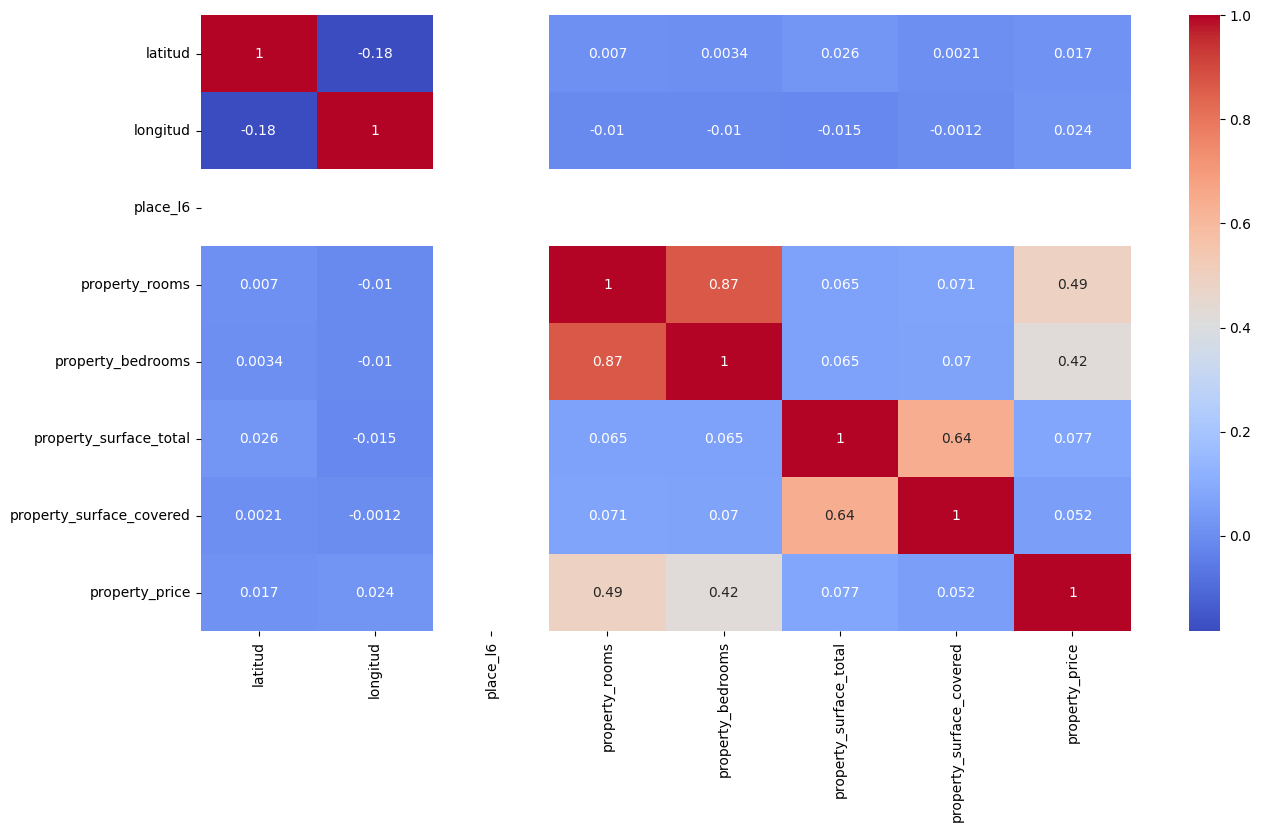

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(matriz_corr, annot = True, cmap='coolwarm')


Se orbserva una la "cruz" blanca correspondiente a los valores NaN (100%) de la columna *place_l6*.
Por otro lado, siguiendo la escala de colores aquellas celdas más cercanas al rojo presentan una buena correlación lineal positiva (lineal creciente). En este caso no se observan correlaciones cercanas a -1, que también implicarían relación linealidad pero decreciente.

Teniendo esto en cuenta, vemos que las variables que mejor se relacionan linealmente son: (Ignoramos la diagonal, dado que es la correlación de la variable consigo misma que siempre es perfecta)
- *property_bedrooms* con *property_rooms*  ($\rho$ = 0.87)
- *property_surface_total* con *property_surface_covered*  ($\rho$ = 0.65)


In [ ]:
#sns.pairplot(ds_properati, height=2)

En este pairplot podemos ver las distribuciones bivariadas. En especial nos sirve para efectivamente ver que *property_surface_total* con *property_surface_covered*  y *property_bedrooms* con *property_rooms* tienen una bastante tendencia lineal tal como exponía su correlación de pearson. 

#### Datos Faltantes

##### Columnas

Para todas las columnas se realiza la cuenta del porcentaje de los datos faltantes (tanto para el conjunto de traint y test)

-Porcentaje de datos faltantes dataset train:

In [ ]:
porcentajes_ds_train = ds_properati.isna().sum() / len(ds_properati) * 100
porcentajes_ds_train

created_on                    0.000000
latitud                       4.013299
longitud                      4.013299
provincia                     0.000000
ciudad                        0.455521
barrio                       96.095345
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.144039
property_bedrooms            11.699565
property_surface_total        5.268600
property_surface_covered      3.653333
property_price                1.255301
property_currency             1.312896
dtype: float64

-Porcentaje datos faltantes dataset test:

In [ ]:
porcentajes_ds_test = test.isna().sum() / len(test) * 100
porcentajes_ds_test

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.801246
longitud                      3.801246
provincia                     0.000000
ciudad                        0.455521
barrio                       96.114980
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.167600
property_bedrooms            11.566051
property_surface_total        5.015969
property_surface_covered      3.377140
property_price                1.204252
property_currency             1.272318
property_title                0.000000
dtype: float64

In [ ]:
ds_properati["barrio"].value_counts()

Palermo Hollywood    1268
Palermo Chico         926
Palermo Soho          652
Palermo Viejo         137
Name: barrio, dtype: int64

Se puede notar que las columnas con mayor datos faltantes para ambos datasets son las de place_l6, place_l5 y barrio, siendo los primeros 2 un 100% de datos faltantes y barrio teniendo un 96% de datos faltantes, siendo Palermo Hollywood el dato no nulo mas frecuente.

Realizamos un gráfico a partir de los nans de las variables con respecto al total del dataset.

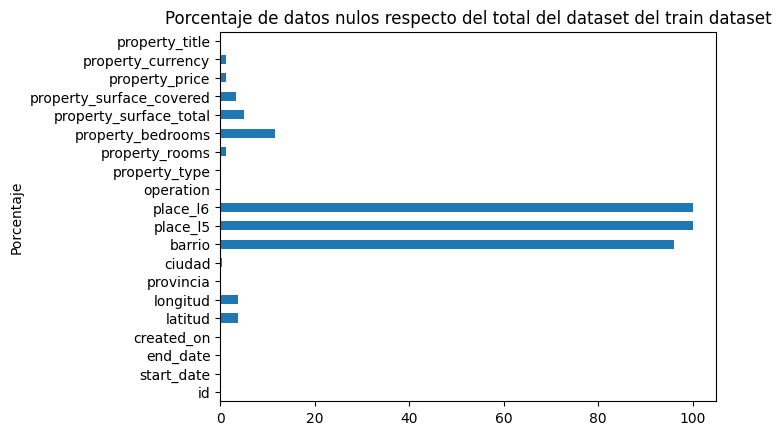

In [ ]:
porcentajes_ds_test.plot(kind = "barh", title="Porcentaje de datos nulos respecto del total del dataset del train dataset", xlabel="Porcentaje",ylabel="Variable")
plt.show()

<AxesSubplot:title={'center':'Porcentaje de datos nulos respecto del total del dataset del test dataset'}, ylabel='Porcentaje'>

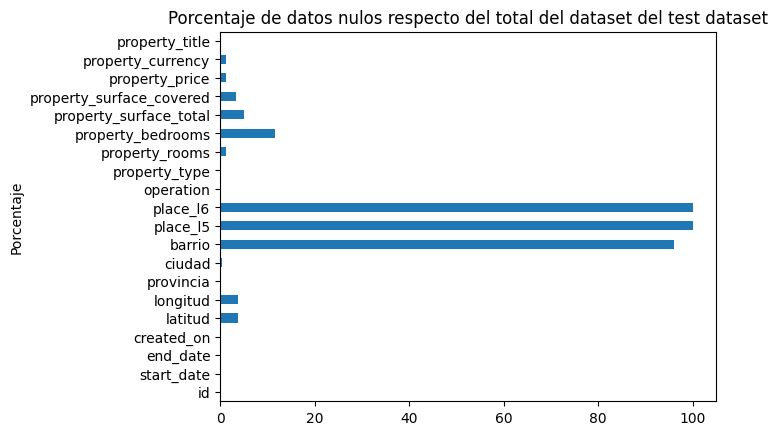

In [ ]:
porcentajes_ds_test.plot(kind = "barh", title="Porcentaje de datos nulos respecto del total del dataset del test dataset", xlabel="Porcentaje",ylabel="Variable")


##### Filas

Por otro lado, calculamos el porcentaje de datos faltantes por cada registro sobre el total de datos del registro.

-Porcentaje ds_train

In [ ]:
porcentaje_Nan_fila_ds_train = (ds_properati.isnull().sum(axis=1) / ds_properati.columns.size * 100).sort_values(ascending=False).value_counts()
porcentaje_Nan_fila_ds_train

18.75    56833
25.00    12645
31.25     3941
12.50     1935
37.50      792
43.75      144
50.00       98
56.25        4
62.50        3
68.75        1
dtype: int64

Lo que se muestra arriba corresponde al porcentaje de nans a la izquierda y a la derecha la cantidad de filas que tienen ese porcentaje.

In [ ]:
(ds_properati.isnull().sum(axis=1)).sort_values(ascending=False).value_counts()

3     56833
4     12645
5      3941
2      1935
6       792
7       144
8        98
9         4
10        3
11        1
dtype: int64

Se puede ver que hay 1 registro con 11 valores faltantes, 4 con 10 y 4 con 9 siendo estos los registros con más valores faltantes (se muestran a continuación). También se puede analizar que 57021 registros tienen 3 valores faltantes, por lo que se puede concluir que es mucho más frecuente tener registros con 3 datos faltantes. 

In [ ]:
ds_properati[(ds_properati.isnull().sum(axis=1) == 11) | (ds_properati.isnull().sum(axis=1) == 9) | (ds_properati.isnull().sum(axis=1) == 10)]

created_on  latitud  longitud        provincia    ciudad  \
1078   2021-03-25      NaN       NaN  Capital Federal       NaN   
8309   2021-03-25      NaN       NaN  Capital Federal       NaN   
9801   2021-06-23      NaN       NaN  Capital Federal       NaN   
17053  2021-07-16      NaN       NaN  Capital Federal   Palermo   
34379  2021-07-19      NaN       NaN  Capital Federal  Congreso   
61564  2021-10-18      NaN       NaN  Capital Federal       NaN   
62227  2021-03-04      NaN       NaN  Capital Federal   Almagro   
72142  2021-05-13      NaN       NaN  Capital Federal     Nuñez   

                  barrio place_l5  place_l6 operation property_type  \
1078                 NaN      NaN       NaN     Venta  Departamento   
8309                 NaN      NaN       NaN     Venta  Departamento   
9801                 NaN      NaN       NaN     Venta  Departamento   
17053  Palermo Hollywood      NaN       NaN     Venta  Departamento   
34379                NaN      NaN       NaN     Venta            PH   
61564                NaN      NaN       NaN     Venta  Departamento   
62227                NaN      NaN       NaN     Venta  Departamento   
72142                NaN      NaN       NaN     Venta            PH   

       property_rooms  property_bedrooms  property_surface_total  \
1078              1.0                NaN                     NaN   
8309              1.0                NaN                     NaN   
9801              NaN                NaN                    26.0   
17053             NaN                NaN                     NaN   
34379             NaN               10.0                     NaN   
61564             NaN                NaN                    26.0   
62227             NaN                NaN                    38.0   
72142             NaN                NaN                   174.0   

       property_surface_covered  property_price property_currency  
1078                       31.0             NaN               NaN  
8309                       40.0             NaN               NaN  
9801                        NaN             NaN               NaN  
17053                     128.0             NaN               NaN  
34379                     428.0             NaN               NaN  
61564                       NaN         85000.0               USD  
62227                       NaN             NaN               NaN  
72142                     105.0             NaN               NaN

Se pueden graficar estos porcentajes para obtener una mejor visualizacion de los datos

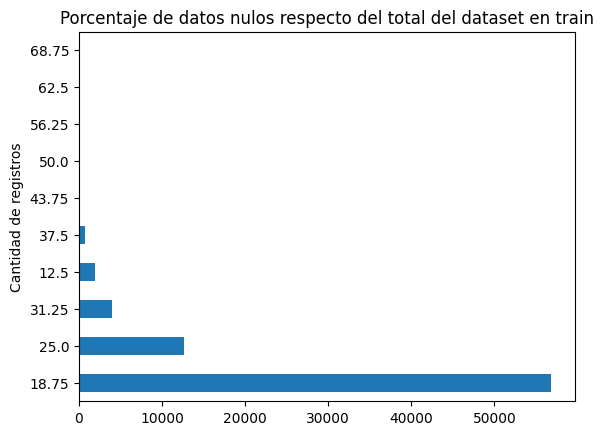

In [ ]:
porcentaje_Nan_fila_ds_train.plot(kind = "barh", title="Porcentaje de datos nulos respecto del total del dataset en train", xlabel="Cantidad de registros",ylabel="Porcentaje")
plt.show()

A partir de este grafico se puede concluir que aproximadamente 60 mil registros tienen 18.8% de datos faltantes, siendo este el porcentaje mas frecuente de datos faltantes en un registro.

-Porcentaje ds_test:

In [ ]:
porcentaje_Nan_fila_ds_test = (test.isnull().sum(axis=1) / ds_properati.columns.size * 100).sort_values(ascending=False).value_counts()
porcentaje_Nan_fila_ds_test

18.75    14327
25.00     3098
31.25      960
12.50      486
37.50      170
43.75       29
50.00       28
62.50        1
dtype: int64

In [ ]:
(test.isnull().sum(axis=1)).sort_values(ascending=False).value_counts()

3     14327
4      3098
5       960
2       486
6       170
7        29
8        28
10        1
dtype: int64

In [ ]:
test[(test.isnull().sum(axis=1) == 11) | (test.isnull().sum(axis=1) == 9) | (test.isnull().sum(axis=1) == 10)]

id  start_date    end_date  created_on  latitud  \
157637  ZMj3jm0NRhE8c7ewz+Eh7g==  2021-05-26  2021-11-04  2021-05-26      NaN   

        longitud        provincia ciudad barrio place_l5  place_l6 operation  \
157637       NaN  Capital Federal    NaN    NaN      NaN       NaN     Venta   

       property_type  property_rooms  property_bedrooms  \
157637  Departamento             2.0                NaN   

        property_surface_total  property_surface_covered  property_price  \
157637                     NaN                      43.0             NaN   

       property_currency                                     property_title  
157637               NaN  Departamento en Venta Caba / Buenos Aires (D03...

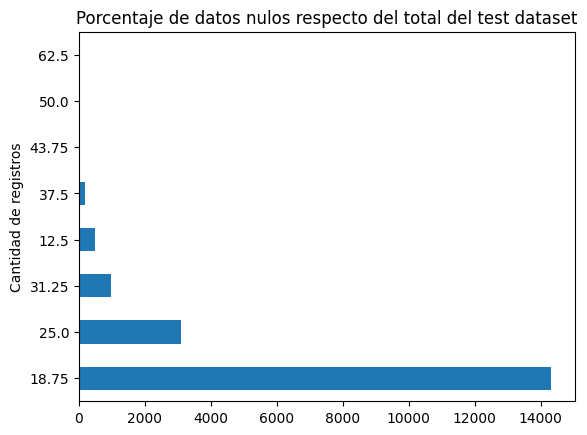

In [ ]:
porcentaje_Nan_fila_ds_test.plot(kind = "barh", title="Porcentaje de datos nulos respecto del total del test dataset", xlabel="Cantidad de registros",ylabel="Porcentaje")
plt.show()

##### Estrategias para aplicar en los datos faltantes

Opción 1: Eliminar registros o variables
Para un primer enfoque, si el porcentaje de una columna frente a los datos faltantes es muy grande y no hay forma de inputarlos, se podría borrar la columna entera, ya que al tener en su mayoría valores faltantes, estos no aportan valor al dataset.

Esta estrategia es particularmente útil en aquellos casos en los que los datos faltantes sean MCAR (missing completly at random), ya que en estos casos se tiene la certeza de que no es posible recuperar los datos faltantes bajo algún criterio. En otro caso, la eliminación de una columna puede generar pórdidas de información, por lo que es una estrategia que debe usarse con precaución.

Opción 2: Crear otra Categoría
Por otro lado, se podría de tomar los datos faltantes de la columna como una categoría más, incluyendo una descripción breve de qué significan los datos faltantes. Por ejemplo en nuestro dataset, dentro de la columna "property rooms", al tener un 1% de datos faltantes, se podría considerar una nueva categoría "ambientes no reportados" incluyendo a estos.

Opción 3: Imputaciones

Otra estrategia es la de la imputación, que comprende un subconjunto de estrategias que permiten reemplazar los datos faltantes por datos con información significativa bajo algún criterio. Cual de estas estrategias usar depende de las necesidades del problema, o de los recursos de los que se disponga.

Como ya se mencionó, la opción 3 es una agrupación de un conjunto de estrategias para resolver un mismo problema, el de imputar información, se describen algunas de ellas:

**1-Sustitución de datos:** Es un simple reemplazo de valores no observados. Se basa en la consulta a expertos en los datos analizados.

**2-Sustitución por media o mediana:** Entre el conjunto de datos analizado, se toma el promedio de ellos, y se reemplazan los datos faltantes por el mismo (no conviene hacerlo cuando gran mayoría de los datos son faltantes o nulos).

**3-Imputación Cold Deck** Selecciona valores de fuentes distintas a la base de datos analizada, esto es, se busca información oficial que permita rellenar los datos faltantes.

**4-Imputacion Hot Deck:** Reemplaza valores faltantes con valores similares entre si (un ejemplo de esto, es tener que rellenar cuantos baños tiene un apartamento de 3 ambientes tomando como referencia datos de otros departamentos de 3 ambientes dentro del dataset).

**5-Imputación por regresión:** Se predice el dato faltante a través de un modelo de regresión.

**6-MICE (multivariate imputation by chained equations):** Se usa basandose de que el origen de los datos faltantes es missing at random (MAR). Este proceso de imputación es un proceso iterativo, en cada iteración cada valor faltante se produce en función de las variables restantes. Cuántas iteraciones hacer depende del problema a resolver.


Para las columnas de place_l5 y place_l6 decidimos usar la opción 1 ya que la gran mayoría de valores son datos faltantes, por lo que no tendría sentido tomar una media de sus valores. Además no sabemos qué representan porque no se provee información de estas variables en la fuente de la que proviene el set de datos.


In [ ]:
columnas_a_eliminar = ["place_l5","place_l6"]
ds_properati.drop(columnas_a_eliminar, axis='columns', inplace=True)
test.drop(columnas_a_eliminar, axis='columns', inplace=True)

##### Análisis de valores faltantes en *barrio*

Analizamos qué hacer con *barrio*. En primer lugar listamos los valores de *ciudad* y *barrio* para ver qué representan.

In [ ]:
ds_properati["ciudad"].unique()

array(['Balvanera', 'Almagro', 'Villa Devoto', 'Caballito', 'Barracas',
       'Villa Urquiza', 'Palermo', 'Belgrano', 'Villa Ortuzar', 'Nuñez',
       'Barrio Norte', 'Recoleta', 'Villa del Parque', 'Parque Patricios',
       'Congreso', 'Parque Chas', 'Colegiales', 'Villa Pueyrredón', nan,
       'Saavedra', 'Villa Santa Rita', 'Boedo', 'San Nicolás',
       'San Telmo', 'Parque Avellaneda', 'Agronomía', 'Parque Chacabuco',
       'Paternal', 'Villa Luro', 'Flores', 'Constitución', 'Villa Crespo',
       'Villa Lugano', 'Floresta', 'Pompeya', 'Puerto Madero', 'Coghlan',
       'Mataderos', 'Monte Castro', 'Once', 'Liniers', 'Retiro',
       'Versalles', 'San Cristobal', 'Villa Real', 'Villa General Mitre',
       'Boca', 'Monserrat', 'Velez Sarsfield', 'Tribunales', 'Chacarita',
       'Centro / Microcentro', 'Abasto', 'Villa Soldati',
       'Villa Riachuelo', 'Parque Centenario', 'Catalinas', 'Las Cañitas'],
      dtype=object)

In [ ]:
ds_properati["barrio"].unique()


array([nan, 'Palermo Soho', 'Palermo Hollywood', 'Palermo Chico',
       'Palermo Viejo'], dtype=object)

Aquí se puede observar que en el caso de Capital Federal *ciudad* hace referencia al barrio y que los valores de *barrio* no son relevantes frente a los otros. Por lo tanto, dada la alta cantidad de NaNs se procede a eliminar la columna.

In [ ]:
ds_properati.drop("barrio", axis=1, inplace=True)
test.drop("barrio", axis=1, inplace=True)

ds_properati = ds_properati.rename(columns={'ciudad':'barrio'})
test = test.rename(columns={'ciudad':'barrio'})

ds_properati.head(3)

created_on    latitud   longitud        provincia        barrio operation  \
0  2021-03-10 -34.611523 -58.410394  Capital Federal     Balvanera     Venta   
1  2021-04-16 -34.621782 -58.424452  Capital Federal       Almagro     Venta   
2  2021-08-28 -34.592425 -58.515042  Capital Federal  Villa Devoto     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0  Departamento             1.0                NaN                    49.0   
1  Departamento             1.0                NaN                    44.0   
2            PH             3.0                2.0                    76.0   

   property_surface_covered  property_price property_currency  
0                      45.0         79000.0               USD  
1                      40.0         99000.0               USD  
2                      66.0        160000.0               USD

Dado que contamos con las latitudes y longitudes de la ubicación de las observaciones, vamos a imputar los datos faltantes de *ciudad* usándolos si no son nulos. Para eso utilizaremos Geopandas y los polígonos de barrios de CABA provistos por la página del gobierno de la ciudad. Se estaría realizando una imputación Cold Deck.

In [ ]:
#En train
nan_train = ds_properati['barrio'].isnull().sum()
nan_test = test['barrio'].isnull().sum()
print(f"Nans barrio en train: {nan_train} y en test: {nan_test}")

Nans barrio en train: 348 y en test: 87


In [ ]:
ds_properati.reset_index(drop=True, inplace=True) #acomodamos el ds
test.reset_index(drop=True, inplace=True) 

In [ ]:
!pip install geopandas
import geopandas as gp

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
poligonos = gp.read_file("barrios.geojson")
poligonos.head()


BARRIO  COMUNA    PERIMETRO          AREA  OBJETO  \
0         CHACARITA    15.0  7724.852955  3.115707e+06  BARRIO   
1          PATERNAL    15.0  7087.513295  2.229829e+06  BARRIO   
2      VILLA CRESPO    15.0  8131.857075  3.615978e+06  BARRIO   
3  VILLA DEL PARQUE    11.0  7705.389797  3.399596e+06  BARRIO   
4           ALMAGRO     5.0  8537.901368  4.050752e+06  BARRIO   

                                            geometry  
0  MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...  
1  MULTIPOLYGON (((-58.46558 -34.59656, -58.46562...  
2  MULTIPOLYGON (((-58.42375 -34.59783, -58.42495...  
3  MULTIPOLYGON (((-58.49461 -34.61487, -58.49479...  
4  MULTIPOLYGON (((-58.41287 -34.61412, -58.41282...

Graficamos los polígonos.

<AxesSubplot:title={'center':'Barrios de CABA'}, xlabel='Longitud', ylabel='Latitud'>

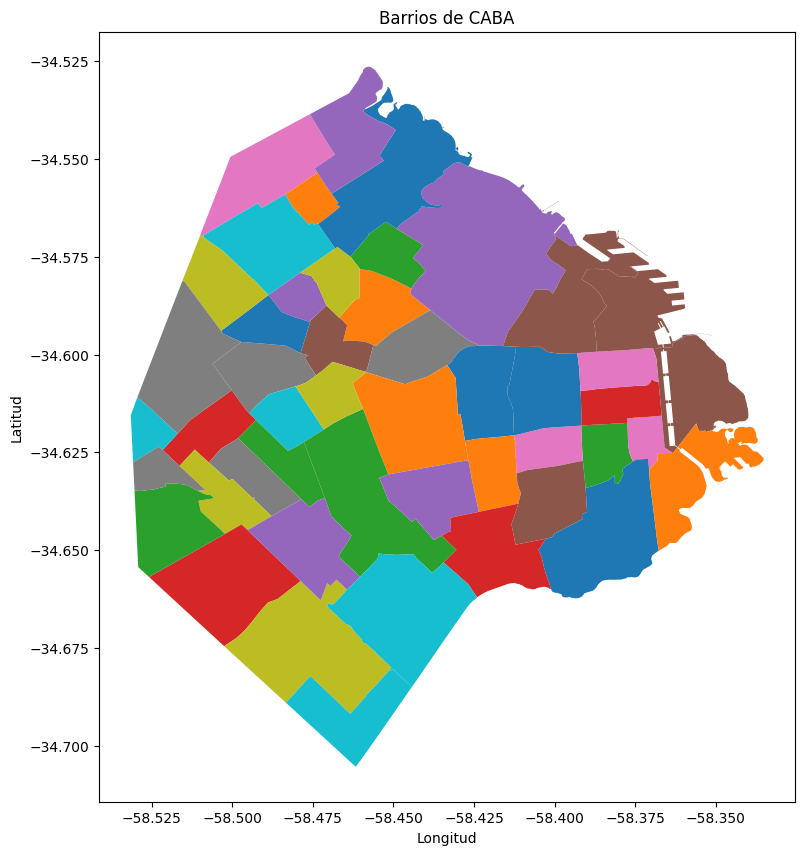

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_title('Barrios de CABA')

ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
poligonos.plot(ax=ax,column='BARRIO')

Se descartan las coordenadas NaNs ya que no son el objetivo de esta ocasión y creamos otro data frame que contenga las filas con ciudades NaN.

In [ ]:
import geopandas as gp
def insertar_barrios(dataFrame):
    ds_copia = dataFrame.copy()

    #Seleccionamos las variables de interés
    ds_barrio_nan = ds_copia.loc[(ds_copia["barrio"].isna()) & (ds_copia["latitud"].isna()==False) & (ds_copia["longitud"].isna()==False)]
    nan_iniciales = ds_barrio_nan.barrio.isna().sum()
    print(f'Cantidad de nan iniciales:{nan_iniciales}')

    #Creamos una geometría de punto para el par longitud y latitud.
    points = gp.GeoDataFrame(ds_barrio_nan, geometry=gp.points_from_xy(ds_barrio_nan.longitud, ds_barrio_nan.latitud))

    #Localizamos los barrios
    for barrio in poligonos.BARRIO:
        b = poligonos[poligonos['BARRIO'] == barrio].index[0] #obtengo el indice del barrio en el df

        #creo un vector true/false si la propiedad está en el barrio (interseccion punto con poligono)
        mask = points.within(poligonos.loc[b, 'geometry']) 
        points.loc[mask,"barrio"] = barrio
    
    print(f'Pasamos de tener {nan_iniciales} barrios NaN a tener {points.barrio.isna().sum()}.')

    #Las que no pudieron ser reemplazadas o bien tienen latitud y longitud NaN (por lo que no pudimos imputar el barrio) o no son de CABA. 
    #Entonces, volcamos los resultados al dataset original y las eliminamos porque no son de interés.
    ds_barrio_nan.drop("geometry", axis=1)
    dataFrame.loc[ds_barrio_nan.index] = ds_barrio_nan 
    dataFrame = dataFrame.loc[(dataFrame["barrio"].isna() == False)]
    print(f'Quedaron {dataFrame["barrio"].isna().sum()} nans de los iniciales')
    dataFrame.reset_index(drop=True, inplace=True)

    return dataFrame

<AxesSubplot:title={'center':'Barrios en test antes de imputar '}, xlabel='Barrio', ylabel='Frecuencia'>

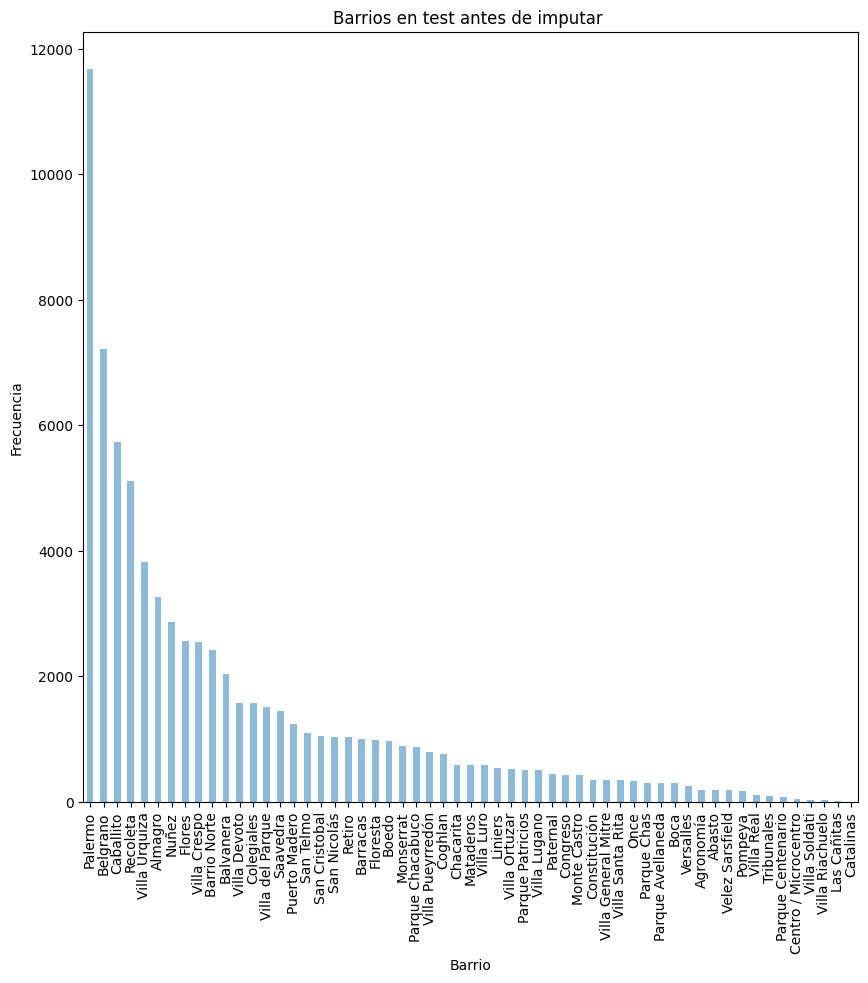

In [ ]:
ds_properati['barrio'].value_counts().plot.bar(alpha=0.5 , title="Barrios en test antes de imputar ", xlabel="Barrio" , ylabel="Frecuencia", figsize=(10,10))


In [ ]:
ds_properati = insertar_barrios(ds_properati)

Cantidad de nan iniciales:210
Pasamos de tener 210 barrios NaN a tener 171.
Quedaron 0 nans de los iniciales


<AxesSubplot:title={'center':'Barrios en train después de imputar '}, xlabel='Barrio', ylabel='Frecuencia'>

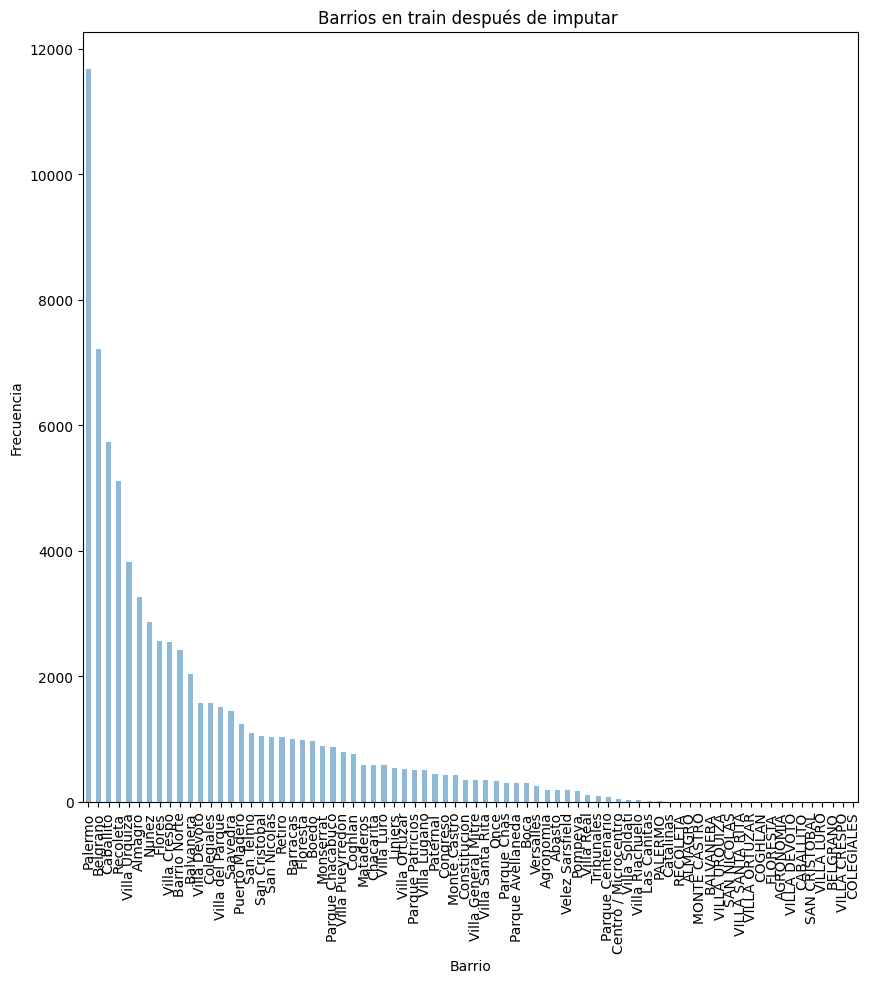

In [ ]:
ds_properati['barrio'].value_counts().plot.bar(alpha=0.5 , title="Barrios en train después de imputar " , xlabel="Barrio" , ylabel="Frecuencia", figsize=(10,10))

<AxesSubplot:title={'center':'Barrios en test antes de imputar '}, xlabel='Barrio', ylabel='Frecuencia'>

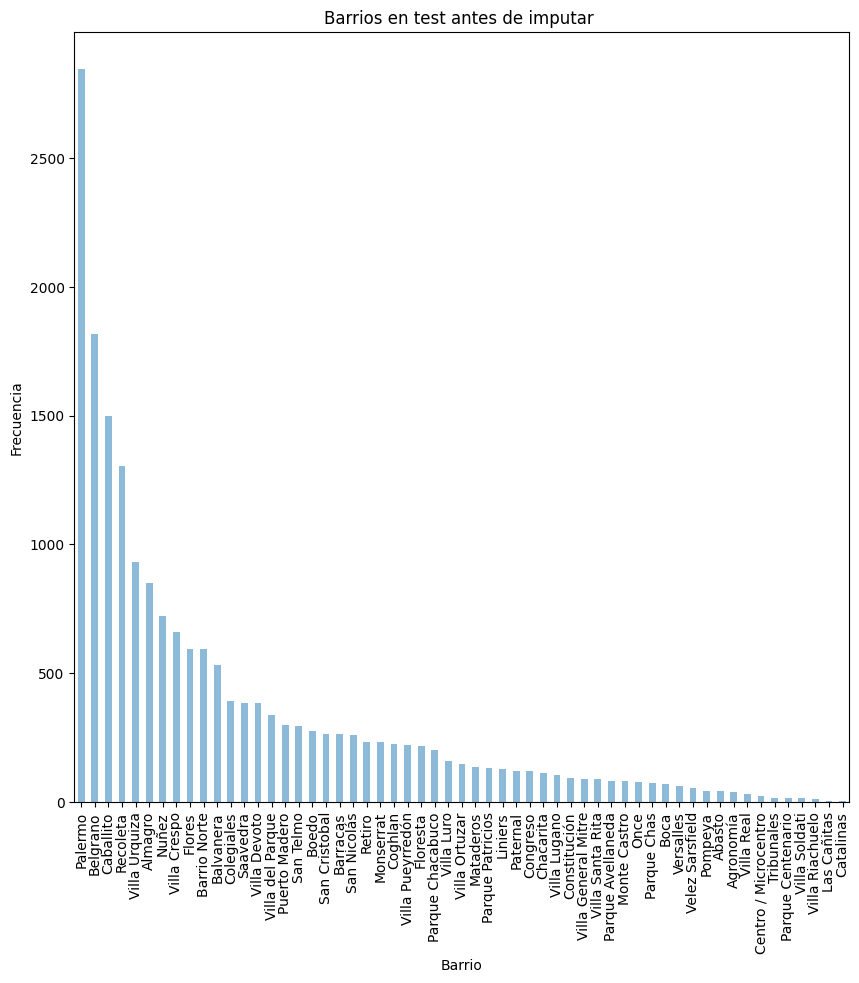

In [ ]:
test['barrio'].value_counts().plot.bar(alpha=0.5 , title="Barrios en test antes de imputar " , xlabel="Barrio" , ylabel="Frecuencia", figsize=(10,10))


In [ ]:
test = insertar_barrios(test)

Cantidad de nan iniciales:50
Pasamos de tener 50 barrios NaN a tener 38.
Quedaron 0 nans de los iniciales


<AxesSubplot:title={'center':'Barrios en test después de imputar '}, xlabel='Barrio', ylabel='Frecuencia'>

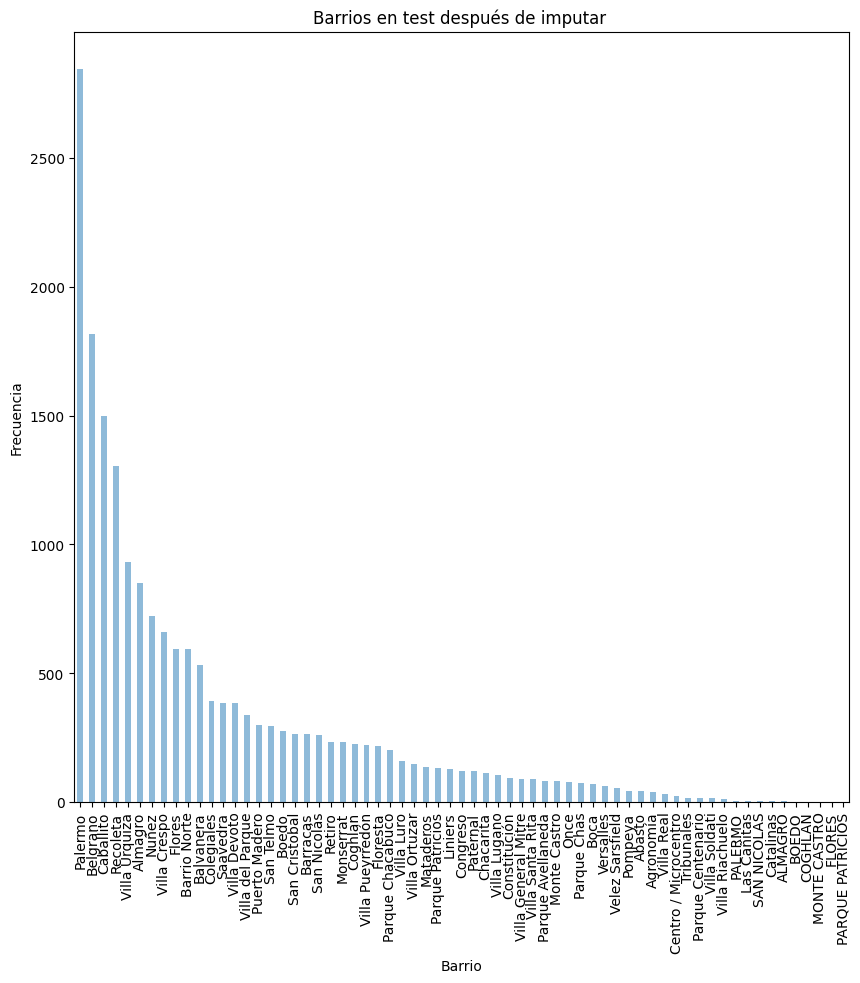

In [ ]:
test['barrio'].value_counts().plot.bar(alpha=0.5 , title="Barrios en test después de imputar " , xlabel="Barrio" , ylabel="Frecuencia", figsize=(10,10))

CONCLUSIONES?

##### Imputación de coordenadas

De la misma manera, vamos a tomar las observaciones que tienen ciudad pero no coordenadas para imputarlas.

In [ ]:

print(ds_properati[ds_properati["longitud"].isnull()].size) 
print(ds_properati[ds_properati["latitud"].isnull()].size)

38064
38064


En todos los casos donde *latitud* es null también lo es *longitud*, por lo tanto filtramos por ambas coordenadas NaN y ciudad existente y agregamos la longitud/ latitud segun la ubicacion de la ciudad .

In [ ]:
#sirven para graficar más adelante
latitud_antes_train = ds_properati['latitud']
longitud_antes_train = ds_properati['longitud']

latitud_antes_test = test.latitud
longitud_antes_test = test.longitud

Primero calculamos el centroide para cada barrio.

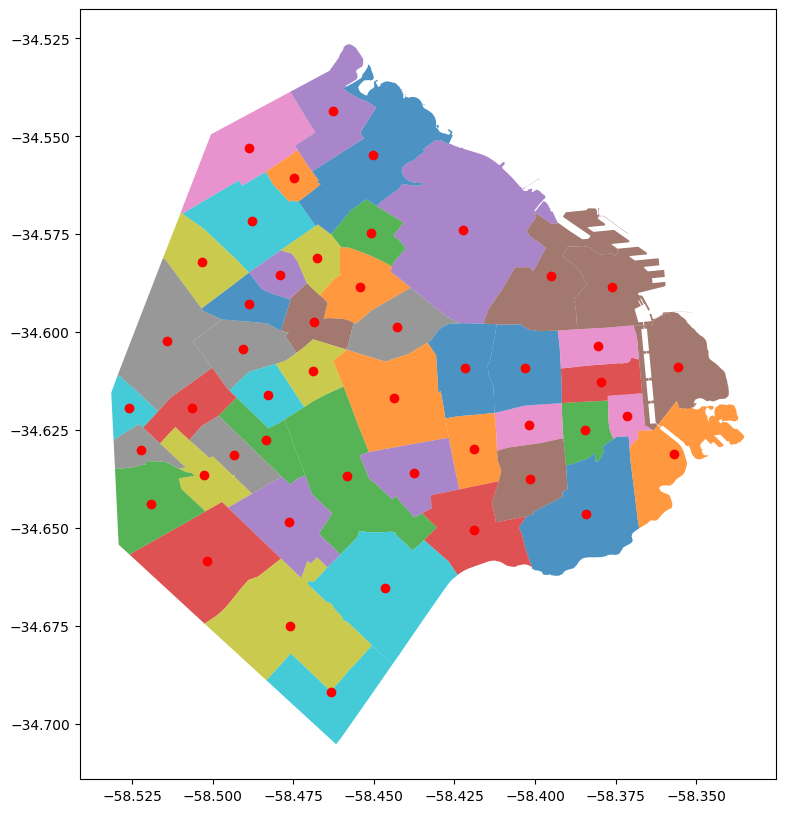

In [ ]:
poligonos["centroide_x"] = poligonos["geometry"].centroid.x
poligonos["centroide_y"] = poligonos["geometry"].centroid.y
#Grafico 
fig, ax = plt.subplots(figsize=(10,10))
poligonos.plot(ax=ax,column='BARRIO',alpha=0.8)
plt.scatter(poligonos.centroide_x, poligonos.centroide_y, color='red')

In [ ]:
poligonos

BARRIO  COMUNA     PERIMETRO          AREA  OBJETO  \
0           CHACARITA    15.0   7724.852955  3.115707e+06  BARRIO   
1            PATERNAL    15.0   7087.513295  2.229829e+06  BARRIO   
2        VILLA CRESPO    15.0   8131.857075  3.615978e+06  BARRIO   
3    VILLA DEL PARQUE    11.0   7705.389797  3.399596e+06  BARRIO   
4             ALMAGRO     5.0   8537.901368  4.050752e+06  BARRIO   
5           CABALLITO     6.0  10990.964471  6.851029e+06  BARRIO   
6    VILLA SANTA RITA    11.0   5757.752335  2.153691e+06  BARRIO   
7        MONTE CASTRO    10.0   7361.036418  2.627481e+06  BARRIO   
8          VILLA REAL    10.0   5070.965652  1.334146e+06  BARRIO   
9              FLORES     7.0  15772.439510  8.590784e+06  BARRIO   
10           FLORESTA    10.0   7519.654092  2.320641e+06  BARRIO   
11       CONSTITUCION     1.0   6326.841375  2.101995e+06  BARRIO   
12      SAN CRISTOBAL     3.0   5987.226479  2.043711e+06  BARRIO   
13              BOEDO     5.0   6602.510266  2.609851e+06  BARRIO   
14    VELEZ SARSFIELD    10.0   7045.578332  2.400518e+06  BARRIO   
15         VILLA LURO    10.0   8652.930031  2.566937e+06  BARRIO   
16   PARQUE PATRICIOS     4.0   7878.434993  3.743440e+06  BARRIO   
17          MATADEROS     9.0  11124.635792  7.398179e+06  BARRIO   
18       VILLA LUGANO     8.0  15057.468389  9.296142e+06  BARRIO   
19          SAN TELMO     1.0   5178.032839  1.232270e+06  BARRIO   
20           SAAVEDRA    12.0  11132.139346  5.538677e+06  BARRIO   
21            COGHLAN    12.0   4627.563131  1.279951e+06  BARRIO   
22      VILLA URQUIZA    12.0  10021.459665  5.449059e+06  BARRIO   
23         COLEGIALES    13.0   6374.619045  2.289774e+06  BARRIO   
24          BALVANERA     3.0   8375.821811  4.342280e+06  BARRIO   
25  VILLA GRAL. MITRE    11.0   6290.440561  2.162275e+06  BARRIO   
26        PARQUE CHAS    15.0   4531.253396  1.385412e+06  BARRIO   
27          AGRONOMIA    15.0   6556.167772  2.122169e+06  BARRIO   
28      VILLA ORTUZAR    15.0   5684.995211  1.853802e+06  BARRIO   
29           BARRACAS     4.0  12789.791771  7.953453e+06  BARRIO   
30  PARQUE AVELLANEDA     9.0  10165.614028  4.732708e+06  BARRIO   
31   PARQUE CHACABUCO     7.0   8406.914321  3.832117e+06  BARRIO   
32      NUEVA POMPEYA     4.0  11033.510302  4.951511e+06  BARRIO   
33            PALERMO    14.0  22126.531858  1.584587e+07  BARRIO   
34    VILLA RIACHUELO     8.0  10596.826739  4.232596e+06  BARRIO   
35      VILLA SOLDATI     8.0  12441.695877  8.688164e+06  BARRIO   
36   VILLA PUEYRREDON    12.0   7522.360382  3.303240e+06  BARRIO   
37       VILLA DEVOTO    11.0  11562.006800  6.404481e+06  BARRIO   
38            LINIERS     9.0   9256.927321  4.374419e+06  BARRIO   
39          VERSALLES    10.0   5650.466286  1.406834e+06  BARRIO   
40      PUERTO MADERO     1.0  17725.720821  5.040971e+06  BARRIO   
41          MONSERRAT     1.0   6739.222311  2.198622e+06  BARRIO   
42        SAN NICOLAS     1.0   6548.084754  2.289008e+06  BARRIO   
43           BELGRANO    13.0  20609.775397  7.999240e+06  BARRIO   
44           RECOLETA     2.0  21452.838648  6.317265e+06  BARRIO   
45             RETIRO     1.0  18837.988687  4.512711e+06  BARRIO   
46              NUÑEZ    13.0  10785.261081  4.424199e+06  BARRIO   
47               BOCA     4.0  20060.003939  5.036240e+06  BARRIO   

                                             geometry  centroide_x  \
0   MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...   -58.454180   
1   MULTIPOLYGON (((-58.46558 -34.59656, -58.46562...   -58.468665   
2   MULTIPOLYGON (((-58.42375 -34.59783, -58.42495...   -58.442725   
3   MULTIPOLYGON (((-58.49461 -34.61487, -58.49479...   -58.490677   
4   MULTIPOLYGON (((-58.41287 -34.61412, -58.41282...   -58.421745   
5   MULTIPOLYGON (((-58.43061 -34.60705, -58.43056...   -58.443603   
6   MULTIPOLYGON (((-58.48192 -34.62429, -58.48274...   -58.482957   
7   MULTIPOLYGON (((-58.50349 -34.62403, -58.50467...   -58.506581   
8  

In [ ]:
def buscar_barrios(ds_nan):
    for barrio in poligonos.BARRIO:
        b = poligonos[poligonos['BARRIO'] == barrio].index[0]
        lat = poligonos.loc[b, 'centroide_y']
        lon = poligonos.loc[b, 'centroide_x']
        ds_nan.loc[(ds_nan["barrio"] == barrio), "latitud"] = lat
        ds_nan.loc[(ds_nan["barrio"] == barrio), "longitud"] = lon
    return ds_nan

In [ ]:
def imputar_barrios_erroneos(dataFrame):
    print(f'Nombre de barrios del dataset: {dataFrame.barrio.unique()}')
    print(f'Nombre de barrios del geojson: {poligonos["BARRIO"].unique()}')
    print('''
    
    Las diferencias acá son:
    - ONCE es parte de BALVANERA
    - BARRIO NORTE comprende parte de los barrios RETIRO y RECOLETA
    - SAN NICOLÁS, VILLA PUEYRREDÓN y CONSTITUCIÓN aparecen sin tilde
    - CONGRESO es zona este de BALVANERA
    - ABASTO es un sub-barrio de BALVANERA (aunque también toma parte de ALMAGRO)
    - TRIBUNALES es parte de SAN NICOLAS
    - VILLA GENERAL MITRE aparece como VILLA GRAL. MITRE
    - POMPEYA es NUEVA POMPEYA
    - PARQUE CENTENARIO corresponde a CABALLITO
    - MICROCENTRO es parte de SAN NICOLAS
    Teniendo esto en cuenta aplicaremos los cambios correspondientes para que haya unicidad en los nombres e imputaremos las coordenadas nuevamente.
    ''')

    ds_copia = dataFrame.copy()
    ds_coord_nans = ds_copia.loc[(ds_copia["latitud"].isna()) & (ds_copia["longitud"].isna())]

    ds_coord_nans['barrio'].replace({'TRIBUNALES':'SAN NICOLAS', 'VILLA GENERAL MITRE':'VILLA GRAL. MITRE', 'POMPEYA':'NUEVA POMPEYA', 'PARQUE CENTENARIO':'CABALLITO','ONCE':'BALVANERA','SAN NICOLÁS':'SAN NICOLAS', 'VILLA PUEYRREDÓN':'VILLA PUEYRREDON', 'CONSTITUCIÓN':'CONSTITUCION', 'CONGRESO':'BALVANERA','CENTRO / MICROCENTRO':'SAN NICOLAS', 'ABASTO':'BALVANERA', 'BARRIO NORTE':'RECOLETA', 'AGRONOMÍA': 'AGRONOMIA'}, inplace=True)

    ds_coord_nans = buscar_barrios(ds_coord_nans)

    dataFrame.loc[ds_properati.loc[ds_coord_nans.index].index, 'latitud'] = ds_coord_nans['latitud']
    dataFrame.loc[ds_properati.loc[ds_coord_nans.index].index, 'longitud'] = ds_coord_nans['longitud']
    return dataFrame

In [ ]:
def imputar_coordenadas(dataFrame):
    dataFrame['barrio'] = dataFrame['barrio'].str.upper() #paso a mayúscula para que coincida con los nombres de los polígonos
    ds_copia = dataFrame.copy()
    ds_coord_nan = ds_copia.loc[(ds_copia["barrio"].isna() == False) & (ds_copia["latitud"].isna()) & (ds_copia["longitud"].isna())]
    print(f'Nans iniciales de lat y lon: {ds_coord_nan.shape[0]}')

    #Buscamos los barrios
    ds_coord_nan = buscar_barrios(ds_coord_nan)


    dataFrame.loc[ds_coord_nan.index] = ds_coord_nan

    #Vemos si quedó algún valor sin imputar
    sin_coord = ds_properati.loc[(ds_properati["latitud"].isna()) & (ds_properati["longitud"].isna())]
    if(sin_coord.shape[0] > 0):
        print(f'Quedaron {sin_coord.shape[0]} coordenadas sin llenar. Vemos por qué:')
        imputar_barrios_erroneos(dataFrame)

    print(f'Nans lat después: {ds_properati["latitud"].isna().sum()}')
    print(f'Nans lon después: {ds_properati["longitud"].isna().sum()}')
    return dataFrame


Finalmente reemplazamos todos los NaN de latitud y longitud. Primero en el conjunto de train y luego en el de test. Realizamos un gráfico para ver si distribución luego de la imputación.

In [ ]:
ds_properati = imputar_coordenadas(ds_properati)

Nans iniciales de lat y lon: 2928
Quedaron 313 coordenadas sin llenar. Vemos por qué:
Nombre de barrios del dataset: ['BALVANERA' 'ALMAGRO' 'VILLA DEVOTO' 'CABALLITO' 'BARRACAS'
 'VILLA URQUIZA' 'PALERMO' 'BELGRANO' 'VILLA ORTUZAR' 'NUÑEZ'
 'BARRIO NORTE' 'RECOLETA' 'VILLA DEL PARQUE' 'PARQUE PATRICIOS'
 'CONGRESO' 'PARQUE CHAS' 'COLEGIALES' 'VILLA PUEYRREDÓN' 'SAAVEDRA'
 'VILLA SANTA RITA' 'BOEDO' 'SAN NICOLÁS' 'SAN TELMO' 'PARQUE AVELLANEDA'
 'AGRONOMÍA' 'PARQUE CHACABUCO' 'PATERNAL' 'VILLA LURO' 'FLORES'
 'CONSTITUCIÓN' 'VILLA CRESPO' 'VILLA LUGANO' 'FLORESTA' 'POMPEYA'
 'PUERTO MADERO' 'COGHLAN' 'MATADEROS' 'MONTE CASTRO' 'ONCE' 'LINIERS'
 'RETIRO' 'VERSALLES' 'SAN CRISTOBAL' 'VILLA REAL' 'VILLA GENERAL MITRE'
 'BOCA' 'MONSERRAT' 'VELEZ SARSFIELD' 'TRIBUNALES' 'CHACARITA'
 'CENTRO / MICROCENTRO' 'ABASTO' 'VILLA SOLDATI' 'VILLA RIACHUELO'
 'PARQUE CENTENARIO' 'CATALINAS' 'LAS CAÑITAS' 'SAN NICOLAS' 'AGRONOMIA']
Nombre de barrios del geojson: ['CHACARITA' 'PATERNAL' 'VILLA CRESPO' 'V

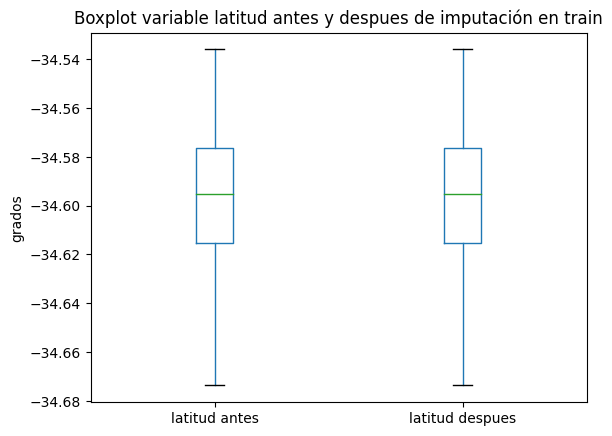

In [ ]:
df_comparado_lat = pd.DataFrame({"latitud antes":latitud_antes_train,"latitud despues":ds_properati['latitud']})
ax = df_comparado_lat[["latitud antes","latitud despues"]].plot(kind= "box",title="Boxplot variable latitud antes y despues de imputación en train",showfliers=False,ylabel="grados")
plt.show()


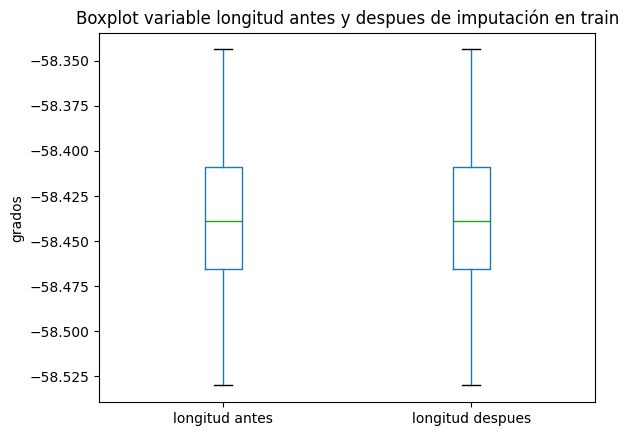

In [ ]:
df_comparado_lon = pd.DataFrame({"longitud antes":longitud_antes_train,"longitud despues":ds_properati['longitud']})
ax = df_comparado_lon[["longitud antes","longitud despues"]].plot(kind= "box",title="Boxplot variable longitud antes y despues de imputación en train",showfliers=False,ylabel="grados")
plt.show()

In [ ]:
test = imputar_coordenadas(test)

Nans iniciales de lat y lon: 689
Nans lat después: 0
Nans lon después: 0


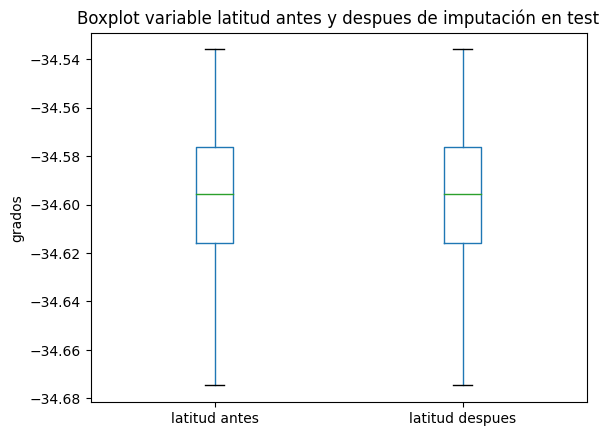

In [ ]:
df_comparado_coord_test = pd.DataFrame({"latitud antes":latitud_antes_test,"latitud despues":test['latitud']})
ax = df_comparado_coord_test[["latitud antes","latitud despues"]].plot(kind= "box",title="Boxplot variable latitud antes y despues de imputación en test",showfliers=False,ylabel="grados")
plt.show()

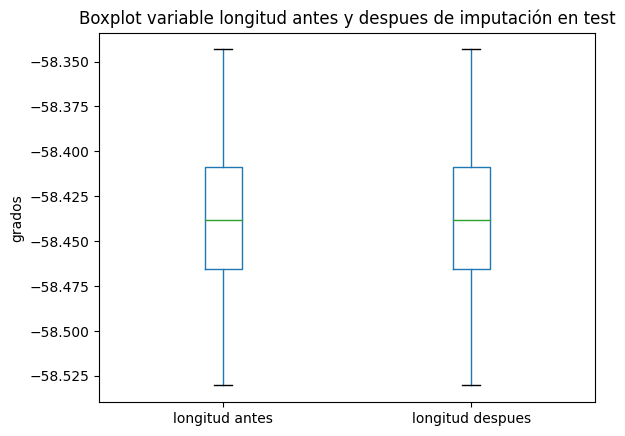

In [ ]:
df_comparado_lon_test = pd.DataFrame({"longitud antes":longitud_antes_test,"longitud despues":test['longitud']})
ax = df_comparado_lon_test[["longitud antes","longitud despues"]].plot(kind= "box",title="Boxplot variable longitud antes y despues de imputación en test",showfliers=False,ylabel="grados")
plt.show()

##### Imputación de los valores nans de la categoría *bedrooms* 

Tomamos en cuenta la media de dormitorios de cada uno de los diferentes ambientes (10 ambientes en total)

In [ ]:
def medias_dormitorios(ds):
    medias_bedrooms = []
    repeticiones = 0
    for cant in range(1,11): #hasta 10 ambientes dado el analisis de más adelante de outliers
        ds_copia = ds.copy()
        copia_con_cant_ambientes = ds_copia.loc[ds_copia["property_rooms"]==cant]
        medias_bedrooms.append(round(copia_con_cant_ambientes["property_bedrooms"].mean()))
    
    return medias_bedrooms

Como ya tenemos la media de las habitaciones por cada ambientes, procedemos a imputarlas

In [ ]:
def imputar_dormitorios(ds):
    prop_nan = ds.loc[ds["property_bedrooms"].isna()]
    medias_bedrooms = medias_dormitorios(ds)
    ds_property_bedrooms_antes = ds["property_bedrooms"]
    for index,row in prop_nan.iterrows():
        cantidad = row["property_rooms"]
        if cantidad < 11:
            ds.loc[index,"property_bedrooms"] = medias_bedrooms[int(cantidad)-1]
    return ds

In [ ]:
ds_train_bedrooms_antes = ds_properati.property_bedrooms
ds_test_bedrooms_antes = test.property_bedrooms

In [ ]:
ds_properati = imputar_dormitorios(ds_properati)
test = imputar_dormitorios(test)

In [ ]:
display(ds_properati["property_rooms"].unique())
display(test["property_rooms"].unique())

array([ 1.,  3.,  2.,  4.,  5., 10., nan,  6.,  9., 14.,  7.,  8., 12.,
       11., 15., 36., 19., 13., 24., 40., 16., 18., 17., 20., 28., 32.,
       30., 35.])

array([ 2.,  5.,  7.,  3.,  1.,  4.,  6., nan,  9.,  8., 12., 10., 16.,
       14., 15., 19., 11., 13., 28., 17., 20., 30.])

Le imputamos una habitación a todos los registros que sigan sin tener datos de las habitaciones. (Que son aquellos con más de 10 ambientes)

In [ ]:
ds_properati["property_bedrooms"] = ds_properati['property_bedrooms'].fillna(1)
test["property_bedrooms"] = test['property_bedrooms'].fillna(1)

Como en property_bedrooms, imputamos los ambientes según la media de las habitaciones.

In [ ]:
def media_habitaciones(ds):
    medias_rooms = []
    for cant in range(1,11):
        ds_copia = ds.copy()
        copia_con_cant_habitaciones = ds_copia.loc[ds_copia["property_bedrooms"]==cant]
        medias_rooms.append(round(copia_con_cant_habitaciones["property_rooms"].mean()))
    return medias_rooms

In [ ]:
def imputar_rooms(ds): 
    prop_rooms_nan = ds.loc[ds["property_rooms"].isna()]
    medias_rooms = media_habitaciones(ds)
    ds_property_bedrooms_antes = ds["property_bedrooms"]
    for index,row in prop_rooms_nan.iterrows():
        cantidad = row["property_bedrooms"]
        if cantidad < 11:
            ds.loc[index,"property_rooms"] = medias_rooms[int(cantidad)-1]
    return ds

In [ ]:
ds_train_rooms_antes = ds_properati.property_rooms
ds_test_rooms_antes = test.property_rooms

In [ ]:
ds_properati = imputar_rooms(ds_properati)
test = imputar_rooms(test)

In [ ]:
display(ds_properati["property_rooms"].unique())
display(test["property_rooms"].unique())

array([ 1.,  3.,  2.,  4.,  5., 10.,  6.,  9., 14.,  7.,  8., 12., 11.,
       15., 36., nan, 19., 13., 24., 40., 16., 18., 17., 20., 28., 32.,
       30., 35.])

array([ 2.,  5.,  7.,  3.,  1.,  4.,  6.,  9.,  8., nan, 12., 10., 16.,
       11., 14., 15., 19., 13., 28., 17., 20., 30.])

Graficamos las features antes y despúes de la imputación

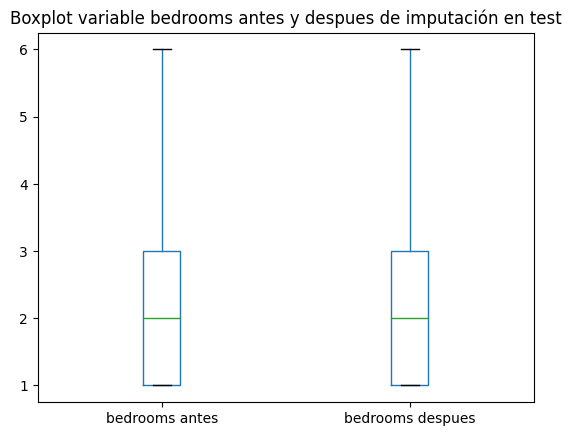

In [ ]:
df_comparado_bedrooms_test = pd.DataFrame({"bedrooms antes": ds_test_bedrooms_antes,"bedrooms despues":test['property_bedrooms']})
ax = df_comparado_bedrooms_test[["bedrooms antes","bedrooms despues"]].plot(kind= "box",title="Boxplot variable bedrooms antes y despues de imputación en test",showfliers=False)
plt.show()

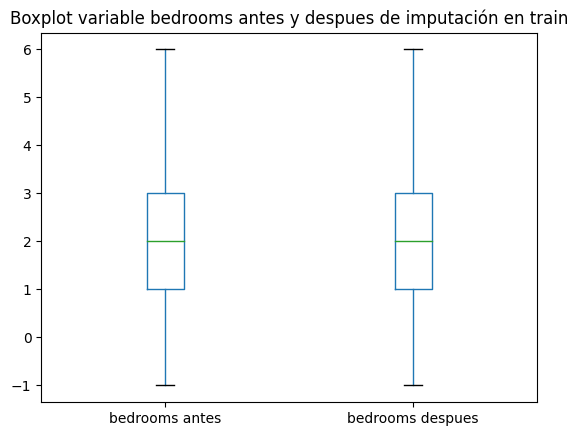

In [ ]:
df_comparado_bedrooms_train = pd.DataFrame({"bedrooms antes": ds_train_bedrooms_antes,"bedrooms despues":ds_properati['property_bedrooms']})
ax = df_comparado_bedrooms_train[["bedrooms antes","bedrooms despues"]].plot(kind= "box",title="Boxplot variable bedrooms antes y despues de imputación en train",showfliers=False)
plt.show()

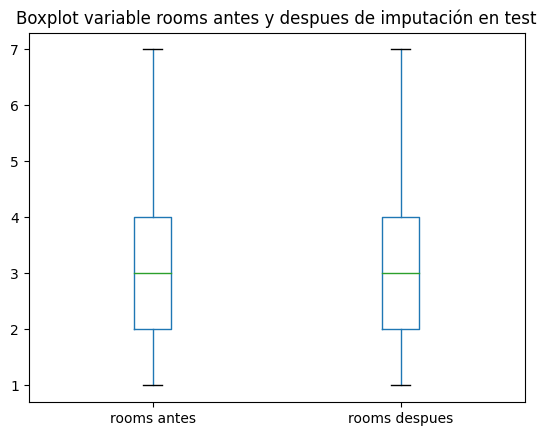

In [ ]:
df_comparado_rooms_test = pd.DataFrame({"rooms antes": ds_test_rooms_antes,"rooms despues":test['property_rooms']})
ax = df_comparado_rooms_test[["rooms antes","rooms despues"]].plot(kind= "box",title="Boxplot variable rooms antes y despues de imputación en test",showfliers=False)
plt.show()

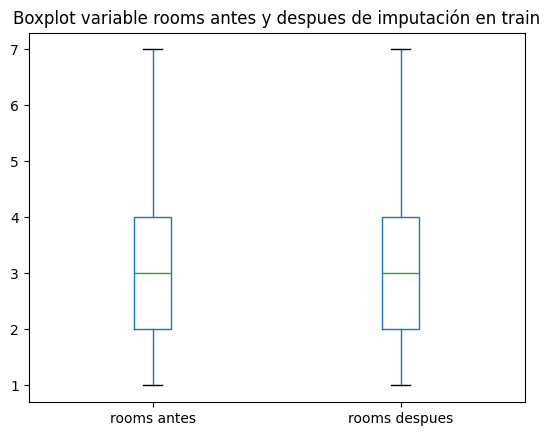

In [ ]:
df_comparado_rooms_train = pd.DataFrame({"rooms antes": ds_train_rooms_antes,"rooms despues":ds_properati['property_rooms']})
ax = df_comparado_rooms_train[["rooms antes","rooms despues"]].plot(kind= "box",title="Boxplot variable rooms antes y despues de imputación en train",showfliers=False)
plt.show()

##### Property_surface_total y property_surface_covered 

Para las columnas de property_surface_total y property_surface_covered adquirimos la estategia de la opcion 3 adoptando la media de sus valores totales no faltantes:

In [ ]:
def imputar_superficie(ds):    
    prop_surface_covered_antes = ds["property_surface_covered"]
    ds["property_surface_total"] = ds['property_surface_total'].fillna(ds['property_surface_total'].mean())
    ds["property_surface_covered"] = ds['property_surface_covered'].fillna(ds['property_surface_covered'].mean())
    return ds

In [ ]:
prop_surface_total_antes_train = ds_properati["property_surface_total"]
prop_surface_covered_antes_train = ds_properati["property_surface_covered"]
prop_surface_total_antes_test = test["property_surface_total"]
prop_surface_covered_antes_test = test["property_surface_covered"]

In [ ]:
ds_properati = imputar_superficie(ds_properati)
test = imputar_superficie(test)

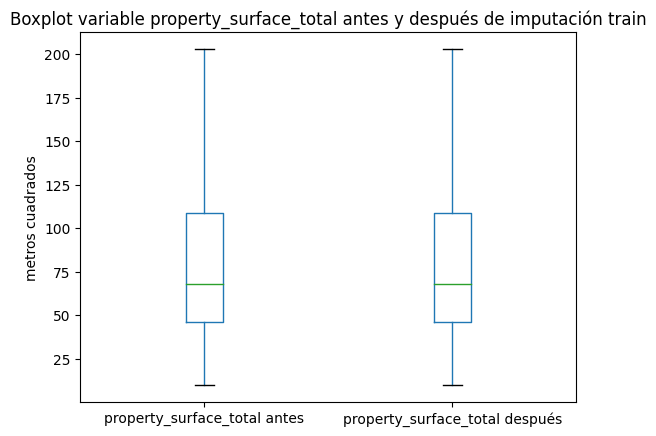

In [ ]:
df_comparado = pd.DataFrame({"property_surface_total antes":prop_surface_total_antes_train,"property_surface_total después":ds_properati['property_surface_total']})
ax = df_comparado[["property_surface_total antes","property_surface_total después"]].plot(kind= "box",title="Boxplot variable property_surface_total antes y después de imputación train",showfliers=False,ylabel="metros cuadrados")
plt.show()


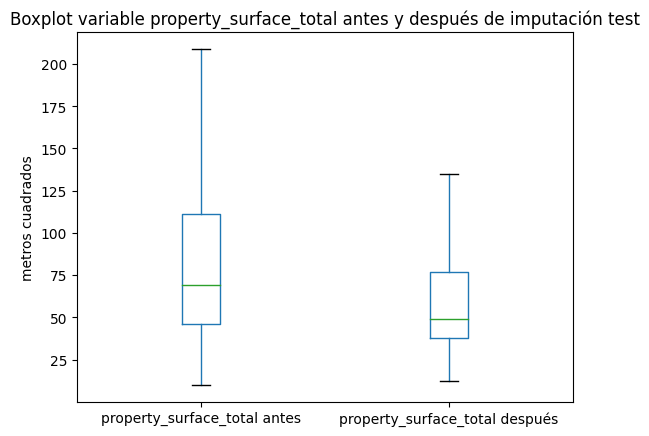

In [ ]:
df_comparado = pd.DataFrame({"property_surface_total antes":prop_surface_total_antes_test,"property_surface_total después":test['property_surface_total']})
ax = df_comparado[["property_surface_total antes","property_surface_total después"]].plot(kind= "box",title="Boxplot variable property_surface_total antes y después de imputación test",showfliers=False,ylabel="metros cuadrados")
plt.show()

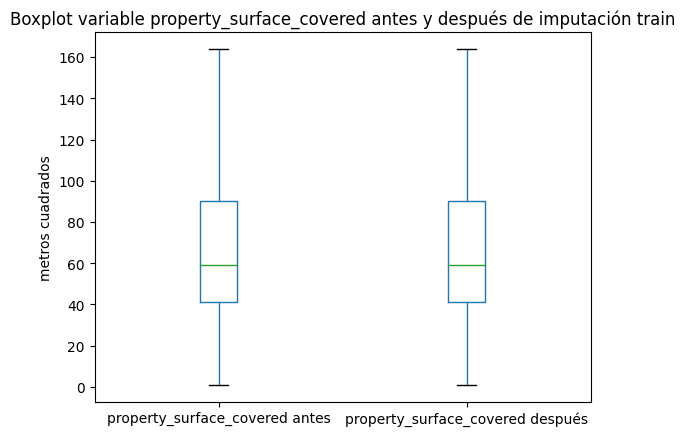

In [ ]:
df_comparado = pd.DataFrame({"property_surface_covered antes":prop_surface_covered_antes_train,"property_surface_covered después":ds_properati['property_surface_covered']})
ax = df_comparado[["property_surface_covered antes","property_surface_covered después"]].plot(kind= "box",title="Boxplot variable property_surface_covered antes y después de imputación train",showfliers=False,ylabel="metros cuadrados")
plt.show()

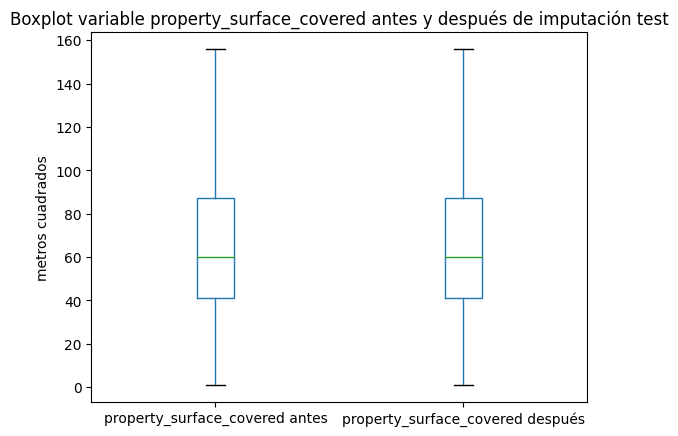

In [ ]:
df_comparado = pd.DataFrame({"property_surface_covered antes":prop_surface_covered_antes_test,"property_surface_covered después":test['property_surface_covered']})
ax = df_comparado[["property_surface_covered antes","property_surface_covered después"]].plot(kind= "box",title="Boxplot variable property_surface_covered antes y después de imputación test",showfliers=False,ylabel="metros cuadrados")
plt.show()

##### Análisis de valores faltantes en *currency*

Revisaremos de qué manera podríamos deducir la moneda que le corresponde a una propiedad. Para poder determinarlo, mínimamente deberíamos contar con el precio de la propiedad de manera de poder entender en qué moneda podría estar.

In [ ]:
ds_currency_nan = ds_properati.loc[ds_properati.property_currency.isna()]
ds_currency_nan.head()

created_on    latitud   longitud        provincia     barrio operation  \
145  2021-02-19 -34.556692 -58.462459  Capital Federal   BELGRANO     Venta   
159  2021-05-05 -34.615758 -58.446787  Capital Federal  CABALLITO     Venta   
240  2021-12-16 -34.628133 -58.453366  Capital Federal  CABALLITO     Venta   
528  2021-03-08 -34.569568 -58.469766  Capital Federal   BELGRANO     Venta   
532  2021-02-11 -34.567567 -58.431303  Capital Federal    PALERMO     Venta   

    property_type  property_rooms  property_bedrooms  property_surface_total  \
145  Departamento             2.0                1.0                    43.0   
159  Departamento             2.0                1.0                    44.0   
240  Departamento             3.0                2.0                    84.0   
528  Departamento             3.0                2.0                    63.0   
532  Departamento             5.0                3.0                   305.0   

     property_surface_covered  property_price property_currency  
145                      43.0             NaN               NaN  
159                      43.0             NaN               NaN  
240                      84.0             NaN               NaN  
528                      61.0             NaN               NaN  
532                     270.0             NaN               NaN

In [ ]:
ds_currency_nan_test = test.loc[test.property_currency.isna()]
ds_currency_nan_test.head()

id  start_date    end_date  created_on    latitud  \
304  OLJXgYp19xGclq6aeB6dsQ==  2021-05-02  2021-05-23  2021-05-02 -34.584835   
456  sg5I5IbTFdYlY07c8NB0qA==  2021-10-16  2021-10-20  2021-10-16 -34.616902   
587  EqQhjicFaChv74c4vOo42w==  2021-06-30  9999-12-31  2021-06-30 -34.565643   
617  bOMYoW8oDGcVFuQCXJlV8Q==  2021-06-15  2021-06-18  2021-06-15 -34.598708   
670  yVo2DUm4FTua1zcTQJQv4g==  2021-03-03  2021-07-14  2021-03-03 -34.629306   

      longitud        provincia           barrio operation property_type  \
304 -58.404492  Capital Federal     BARRIO NORTE     Venta  Departamento   
456 -58.377305  Capital Federal        SAN TELMO     Venta            PH   
587 -58.449146  Capital Federal         BELGRANO     Venta  Departamento   
617 -58.521947  Capital Federal     VILLA DEVOTO     Venta          Casa   
670 -58.491747  Capital Federal  VELEZ SARSFIELD     Venta            PH   

     property_rooms  property_bedrooms  property_surface_total  \
304             2.0                1.0                    40.0   
456             4.0                2.0                   106.0   
587             2.0                1.0                    48.0   
617             5.0                4.0                   255.0   
670             3.0                2.0                   136.0   

     property_surface_covered  property_price property_currency  \
304                      40.0             NaN               NaN   
456                      86.0             NaN               NaN   
587                      46.0             NaN               NaN   
617                     255.0             NaN               NaN   
670                     100.0             NaN               NaN   

                                        property_title  
304                        Departamento - Barrio Norte  
456  Venta PH | 4 ambientes con terraza y parrilla ...  
587                            Departamento - Belgrano  
617                Venta Casa de 5 amb en Villa Devoto  
670     PH. Patio. Terraza. Cochera. Frente. Lavadero.

In [ ]:
display(ds_currency_nan.shape)
ds_price = ds_currency_nan.loc[ds_currency_nan.property_price.isna()]
display(ds_price.shape)

(988, 13)

(944, 13)

In [ ]:
display(ds_currency_nan_test.shape)
ds_price_test = ds_currency_nan_test.loc[ds_currency_nan_test.property_price.isna()]
display(ds_price_test.shape)

(112, 17)

(105, 17)

Tenemos registros que no tienen precio por lo cual no tenemos forma de predecir qué moneda le corresponde. Estas filas las eliminamos dado que no son un gran porcentaje del data set.

In [ ]:
ds_properati.drop(ds_price.index, inplace=True)
test.drop(ds_price_test.index, inplace=True)

KeyError: '[ 7071  9647 10578 13272 13600 13998] not found in axis'

Las restantes que sí poseen precio las vamos a examinar más en detalle.

In [ ]:
ds_currency_nan = ds_properati.loc[ds_properati.property_currency.isna()]
ds_currency_nan.property_price.unique()


array([0.])

In [ ]:
ds_currency_nan_test = test.loc[test.property_currency.isna()]
ds_currency_nan_test.property_price.unique()

array([nan,  0.])

Tenemos que el precio que les figura es cero. Por el momento lo dejaremos así dado que los valores atípicos de price lo trataremos unas celdas más abajo.

##### Conclusiones

Ahora podemos ver como queda el porcentaje de valores nans respecto del total del data set

In [ ]:
porcentajes = ds_properati.isna().sum() / len(ds_properati) * 100
porcentajes

created_on                  0.000000
latitud                     0.000000
longitud                    0.000000
provincia                   0.000000
barrio                      0.000000
operation                   0.000000
property_type               0.000000
property_rooms              0.006654
property_bedrooms           0.000000
property_surface_total      0.000000
property_surface_covered    0.000000
property_price              0.000000
property_currency           0.058555
dtype: float64

En los casos de imputaciones por media se puede ver que removiendo los outliers, queda un boxplot parecido ya que estamos hallando la media de todos los valores. Se podría decir que no cambia mayormente la distribución de los datos tomando la media para los datos faltantes.

#### Busqueda Valores Atípicos - Univariados


Haciendo boxplots se realiza el análisis de valores atípicos en forma univariada

##### Outliers coordenadas

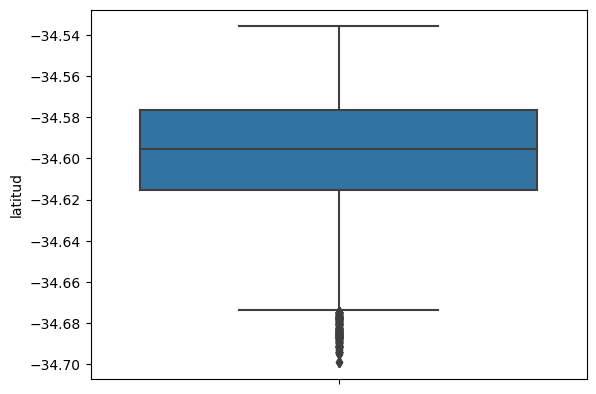

In [ ]:
#Valores atipicos en la latitud para el conjunto de train:
sns.boxplot(y=ds_properati.latitud)
plt.show()

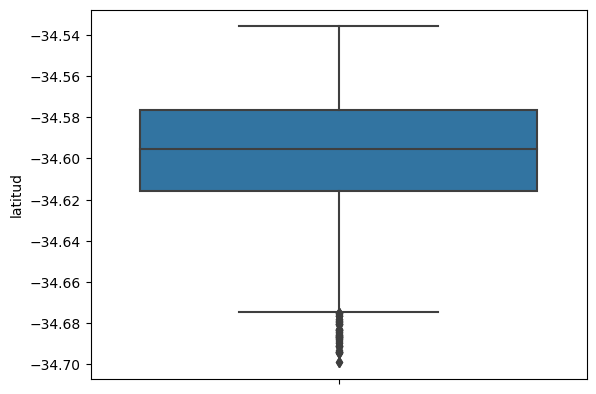

In [ ]:
#Valores atipicos en la latitud para el conjunto de test:
sns.boxplot(y=test.latitud)
plt.show()

Como se puede observar, la abrumadora mayoría de propiedades en venta se encuentran sobre una latitud sur de alrededor de -34º, lo cual coincide con la ubicación geográfica de la Ciudad Autónoma de Buenos Aires. Sin embargo, vemos valores atípicos después de los -34.675°. A primera impresión podrían resultar outliers pero consultando los polígonos, el barrio de Villa Riachuelo presenta la coordenada de latitud más baja con aproximadamente -34.7053°. Asi que no son valores atípicos, están dentro del rango posible.

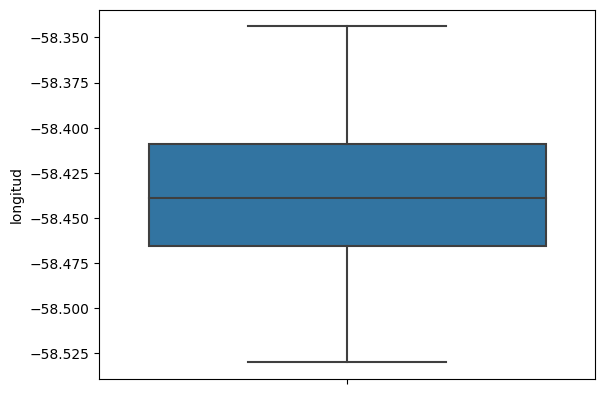

In [ ]:
#Boxplot de la variable longitud para el conjunto de train:
sns.boxplot(y=ds_properati.longitud)
plt.show()

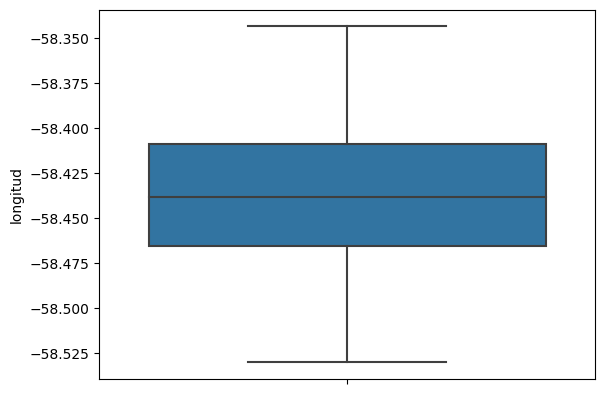

In [ ]:
#Boxplot de la variable longitud para el conjunto de test:
sns.boxplot(y=test.longitud)
plt.show()

Lo mismo sucede con la longitud. La Ciudad Autónoma de Buenos Aires se encuentra a una longitud oeste de ≈-58.43º, lo cual coincide con la gran mayoría de datos (comparando con el boxplot). Se observan outliers en ≈-35° valor que ahora sí no es correcto.

In [ ]:
ds_properati[ds_properati["longitud"] > -40]

Empty DataFrame
Columns: [created_on, latitud, longitud, provincia, barrio, operation, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_currency]
Index: []

In [ ]:
ds_lon_mal = ds_properati[ds_properati["longitud"] > -40]

#por las dudas reemplazamos las localidades que pertenecen a otros barrios o que están escritas diferente en el GeoDataFrame
ds_lon_mal['barrio'].replace({'TRIBUNALES':'SAN NICOLAS', 'VILLA GENERAL MITRE':'VILLA GRAL. MITRE', 'POMPEYA':'NUEVA POMPEYA', 'PARQUE CENTENARIO':'CABALLITO','ONCE':'BALVANERA','SAN NICOLÁS':'SAN NICOLAS', 'VILLA PUEYRREDÓN':'VILLA PUEYRREDON', 'CONSTITUCIÓN':'CONSTITUCION', 'CONGRESO':'BALVANERA','CENTRO / MICROCENTRO':'SAN NICOLAS', 'ABASTO':'BALVANERA', 'BARRIO NORTE':'RECOLETA', 'AGRONOMÍA': 'AGRONOMIA'}, inplace=True)

for barrio in poligonos.BARRIO:
    b = poligonos[poligonos['BARRIO'] == barrio].index[0]
    ds_lon_mal.loc[(ds_lon_mal["barrio"] == barrio), "longitud"] = poligonos.loc[b, 'centroide_x']

ds_properati.loc[ds_properati.loc[ds_lon_mal.index].index, 'longitud'] = ds_lon_mal['longitud']

In [ ]:
ds_properati[ds_properati["longitud"] > -40].shape[0]

0

Por el momento de forma univarida, no quedan valores atípicos en las longitudes.

##### Outliers en los campos de superficie

Para evaluar la existencia de outliers en los campos de superficie, se decide realizar 3 gráficos por separado, en función del tipo de propiedad. Esto se realiza debido a que es de esperarse que una casa pueda llegar a tener más superficie cubierta y total que un departamento.

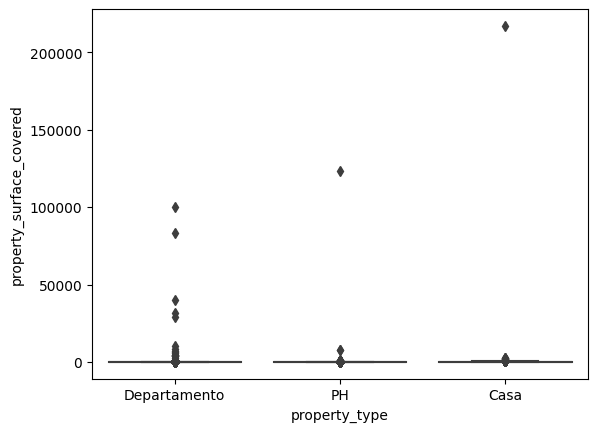

In [ ]:
#Boxplot de la variable property_surface_covered para el conjunto de train:
sns.boxplot(x=ds_properati.property_type, y=ds_properati.property_surface_covered)
plt.show()

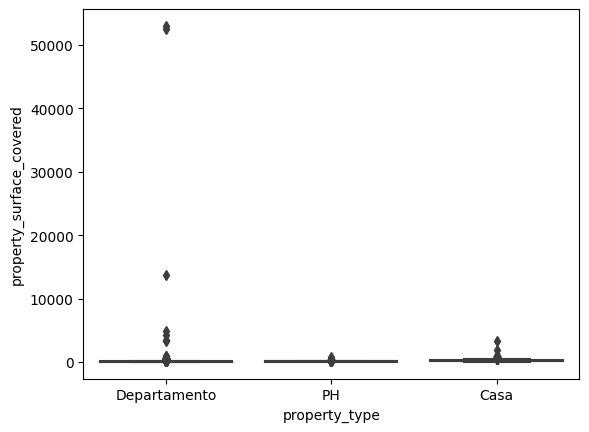

In [ ]:
#Boxplot de la variable property_surface_covered para el conjunto de test:
sns.boxplot(x=test.property_type, y=test.property_surface_covered)
plt.show()

Analizamos los potenciales outliers para cada uno de los tipos de propiedad haciendo uso del z-score modificado. Cada vez que se llama a la función zscore, se imprime la cantidad de outliers hallados.

In [ ]:
def zscore(df, campo):
    casa = df[df['property_type'] == "Casa"]
    dpto = df[df['property_type'] == "Departamento"]
    ph = df[df['property_type'] == "PH"]

    #Cuartiles
    Q1_sup_cubierta_casa = np.quantile(casa[campo], 0.25)
    Q3_sup_cubierta_casa = np.quantile(casa[campo], 0.75)

    Q1_sup_cubierta_dpto = np.quantile(dpto[campo], 0.25)
    Q3_sup_cubierta_dpto = np.quantile(dpto[campo], 0.75)

    Q1_sup_cubierta_ph = np.quantile(ph[campo], 0.25)
    Q3_sup_cubierta_ph = np.quantile(ph[campo], 0.75)

    #Rango intercuartil
    IQR_sup_cubierta_casa = Q3_sup_cubierta_casa - Q1_sup_cubierta_casa
    IQR_sup_cubierta_dpto = Q3_sup_cubierta_dpto - Q1_sup_cubierta_dpto
    IQR_sup_cubierta_ph = Q3_sup_cubierta_ph - Q1_sup_cubierta_ph

    #Límite inferior
    out_inf_casa = Q1_sup_cubierta_casa - 1.5 * IQR_sup_cubierta_casa
    out_sup_casa = Q3_sup_cubierta_casa + 1.5 * IQR_sup_cubierta_casa

    out_inf_dpto = Q1_sup_cubierta_dpto - 1.5 * IQR_sup_cubierta_dpto
    out_sup_dpto = Q3_sup_cubierta_dpto + 1.5 * IQR_sup_cubierta_dpto

    out_inf_ph = Q1_sup_cubierta_ph - 1.5 * IQR_sup_cubierta_ph
    out_sup_ph = Q3_sup_cubierta_ph + 1.5 * IQR_sup_cubierta_ph

    #Z-Score modificado
    mediana_sup_cubierta_casa = np.median(casa[campo])
    MAD = np.median(np.absolute(casa[campo] - mediana_sup_cubierta_casa))
    casa['zm_sup_cubierta'] = (casa[campo] - mediana_sup_cubierta_casa) * 0.6745 / MAD

    mediana_sup_cubierta_dpto = np.median(dpto[campo])
    MAD = np.median(np.absolute(dpto[campo] - mediana_sup_cubierta_dpto))
    dpto['zm_sup_cubierta'] = (dpto[campo] - mediana_sup_cubierta_dpto) * 0.6745 / MAD

    mediana_sup_cubierta_ph = np.median(ph[campo])
    MAD = np.median(np.absolute(ph[campo] - mediana_sup_cubierta_ph))
    ph['zm_sup_cubierta'] = (ph[campo] - mediana_sup_cubierta_ph) * 0.6745 / MAD

    df.drop(casa[casa['zm_sup_cubierta'] >= 3.5].index, inplace = True)
    df.drop(dpto[dpto['zm_sup_cubierta'] >= 3.5].index, inplace = True)
    df.drop(ph[ph['zm_sup_cubierta'] >= 3.5].index, inplace = True)

    return df

Eliminamos aquellos valores que son outliers.

In [ ]:
ds_properati = zscore(ds_properati, "property_surface_covered")
test = zscore(test, "property_surface_covered")

Adicionalmente, habiendo consultado con el Arquitecto Daniel Pérez, el tamaño mínimo de una vivienda (correspondiente a un monoambiente) es de 18m² (por ley), por lo que cualquier entrada que no cumpla con este requerimiento es eliminada.

In [ ]:
ds_properati = ds_properati[ds_properati.property_surface_covered >= 18]
test = test[test.property_surface_covered >= 18]

Realizando el análisis de entradas para el campo de superficie cubierta.

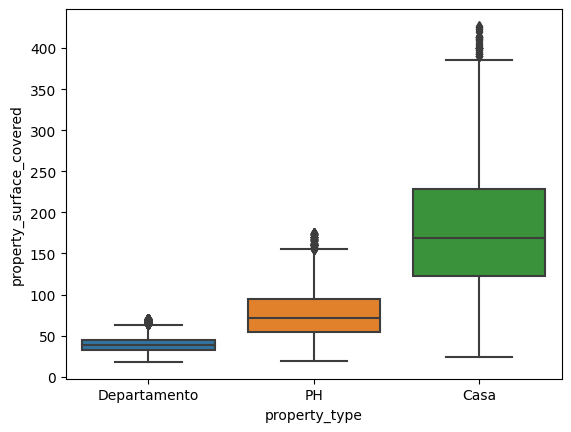

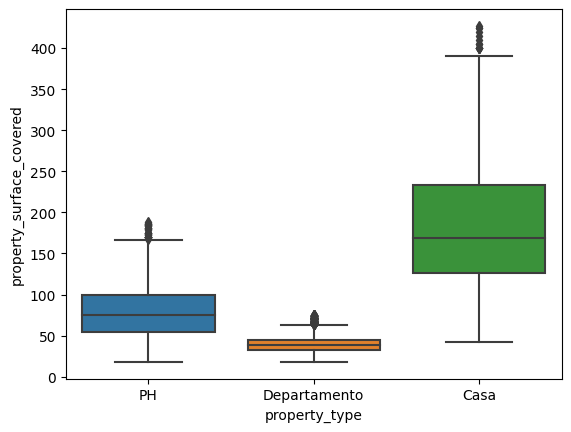

In [ ]:
#Boxplot de la variable property_surface_covered:
sns.boxplot(x=ds_properati.property_type, y=ds_properati.property_surface_covered)
plt.show()
sns.boxplot(x=test.property_type, y=test.property_surface_covered)
plt.show()

Se observan valores atípicos en las 3 categorías de tipo de propiedad, por lo que se aplica el algoritmo de zscore modificado a ambos dataframes.

In [ ]:
ds_properati = zscore(ds_properati, 'property_surface_covered')
test = zscore(test, 'property_surface_covered')

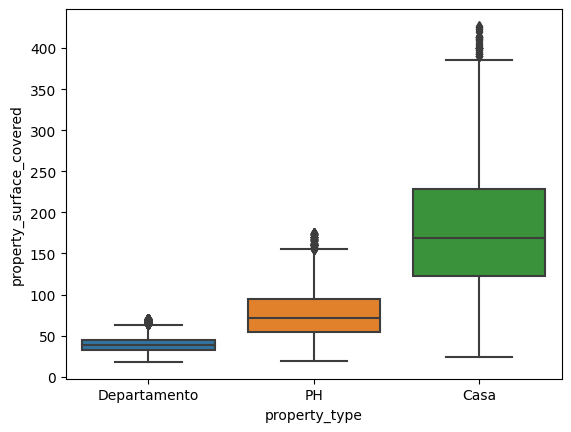

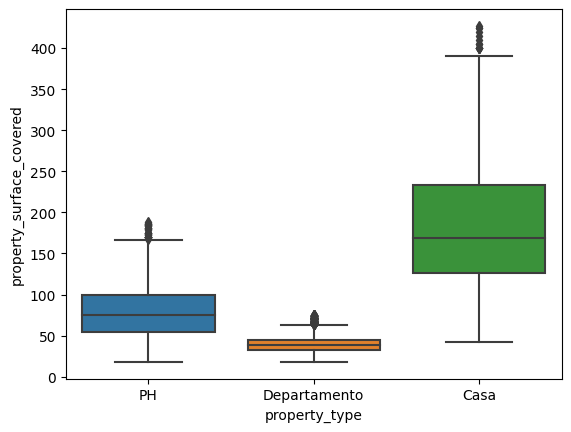

In [ ]:
sns.boxplot(x=ds_properati.property_type, y=ds_properati.property_surface_covered)
plt.show()
sns.boxplot(x=test.property_type, y=test.property_surface_covered)
plt.show()

Repitiendo el mismo proceso para la superficie total, se pueden observar varios outliers, principalmente en las entradas de departamentos.

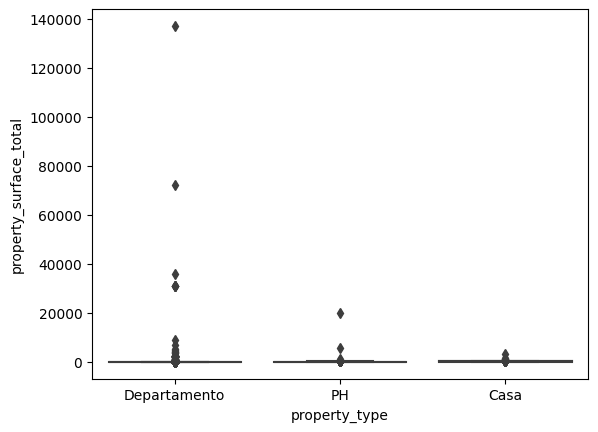

In [ ]:
#Boxplot de la variable property_surface_total para el conjunto de train:
sns.boxplot(x=ds_properati.property_type, y=ds_properati.property_surface_total)
plt.show()

Aplicando z-score modificado.

In [ ]:
ds_properati = zscore(ds_properati, 'property_surface_total')
test = zscore(test, 'property_surface_total')

Nuevamente, se puede observar una distribución más equilibrada y realista.

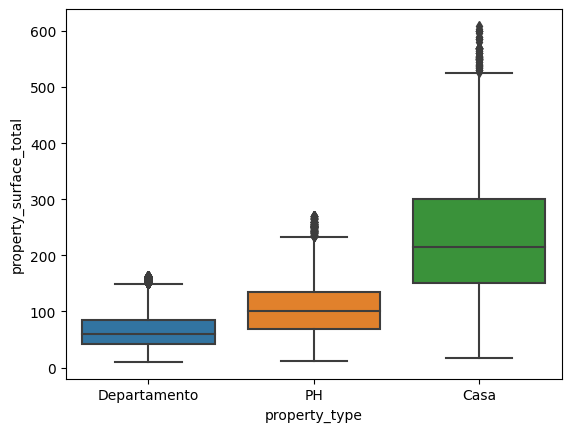

In [ ]:
#Boxplot de la variable property_surface_total sin outliers:
sns.boxplot(x=ds_properati.property_type, y=ds_properati.property_surface_total)
plt.show()
sns.boxplot(x=test.property_type, y=test.property_surface_total)
plt.show()

Repitiendo idea y procedimiento con el precio de las propiedades.

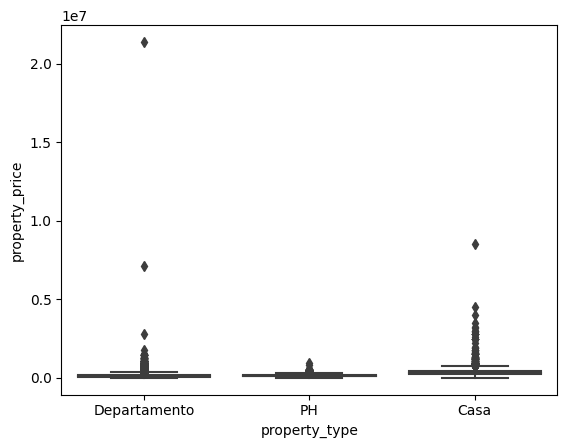

In [ ]:
#Boxlot de la variable property_price:
sns.boxplot(x=ds_properati.property_type, y=ds_properati.property_price)
plt.show()
sns.boxplot(x=test.property_type, y=test.property_price)
plt.show()

Aplicando el mismo concepto para el precio de las propiedades...

In [ ]:
ds_properati = zscore(ds_properati, 'property_price')
test = zscore(test, 'property_price')

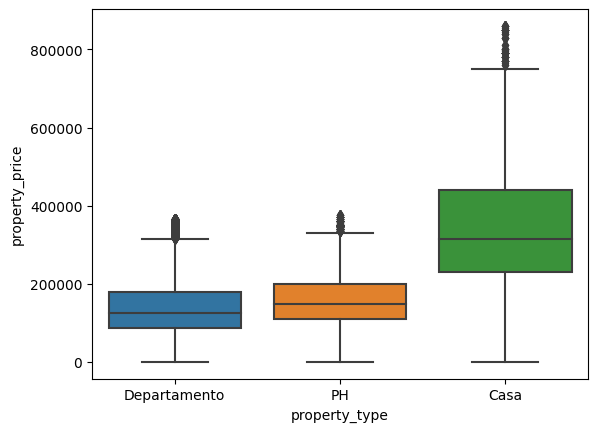

In [ ]:
#Boxlot de la variable property_price sin outliers:
sns.boxplot(x=ds_properati.property_type, y=ds_properati.property_price)
plt.show()
sns.boxplot(x=test.property_type, y=test.property_price)
plt.show()

Ahora para la cantidad de ambientes y dormitorios.

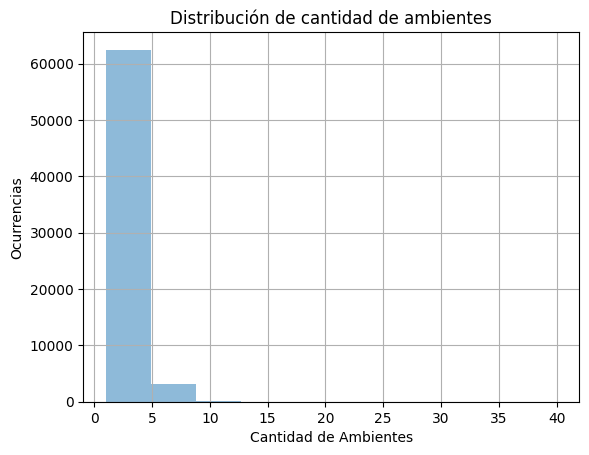

In [ ]:
#Histograma de la variable cantidad de ambientes
plt.title('Distribución de cantidad de ambientes')
plt.hist(ds_properati['property_rooms'], alpha = 0.5) 
plt.xlabel("Cantidad de Ambientes")
plt.ylabel("Ocurrencias")
plt.grid(True)
plt.show()

In [ ]:
ds_properati = zscore(ds_properati, 'property_rooms')
test = zscore(test, 'property_rooms')

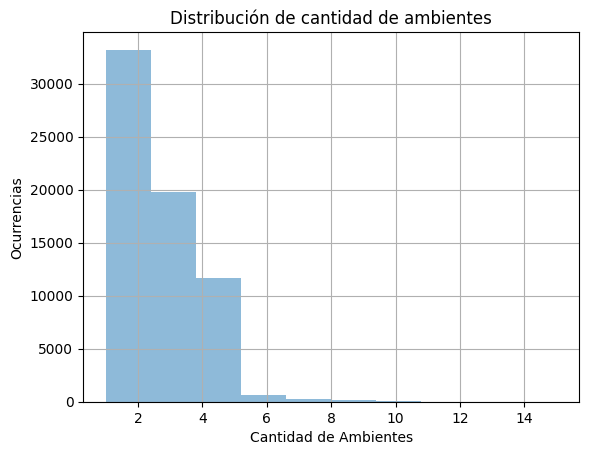

In [ ]:
#Histograma de la variable cantidad de ambientes sin outliers
plt.title('Distribución de cantidad de ambientes')
plt.hist(ds_properati['property_rooms'], alpha = 0.5) 
plt.xlabel("Cantidad de Ambientes")
plt.ylabel("Ocurrencias")
plt.grid(True)
plt.show()

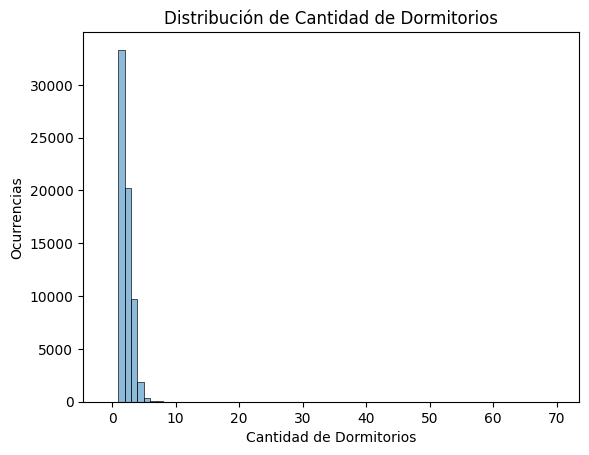

In [ ]:
#Histograma de la variable cantidad de dormitorios
sns_hist = sns.histplot(data=ds_properati['property_bedrooms'], alpha = 0.5, binwidth=1).set(title="Distribución de Cantidad de Dormitorios",xlabel="Cantidad de Dormitorios",ylabel="Ocurrencias")

In [ ]:
ds_properati = zscore(ds_properati, 'property_bedrooms')
test = zscore(test, 'property_bedrooms')

Mostramos el resultado del análisis de outliers en un histograma

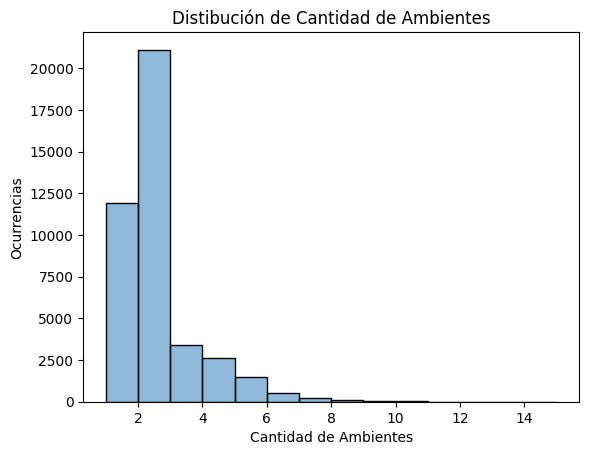

In [ ]:
sns_hist = sns.histplot(data=ds_properati['property_rooms'], alpha = 0.5, binwidth=1).set(title="Distibución de Cantidad de Ambientes",xlabel="Cantidad de Ambientes",ylabel="Ocurrencias")


[Text(0.5, 1.0, 'Distribución de Cantidad de Dormitorios'),
 Text(0.5, 0, 'Cantidad de Dormitorios'),
 Text(0, 0.5, 'Ocurrencias')]

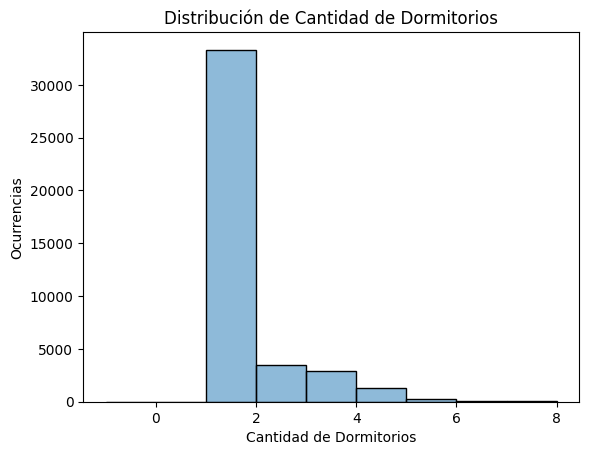

In [ ]:
sns.histplot(data=ds_properati['property_bedrooms'], alpha = 0.5, binwidth=1).set(title="Distribución de Cantidad de Dormitorios",xlabel="Cantidad de Dormitorios",ylabel="Ocurrencias")

Como se puede observar para dormitorios, hay algunas propiedades que cuentan con un valor de -1 ya que, de otra forma, no figuraría en el histograma

In [ ]:
ds_properati = ds_properati[ds_properati['property_bedrooms'] >= 0]
test = test[test['property_bedrooms'] >= 0]

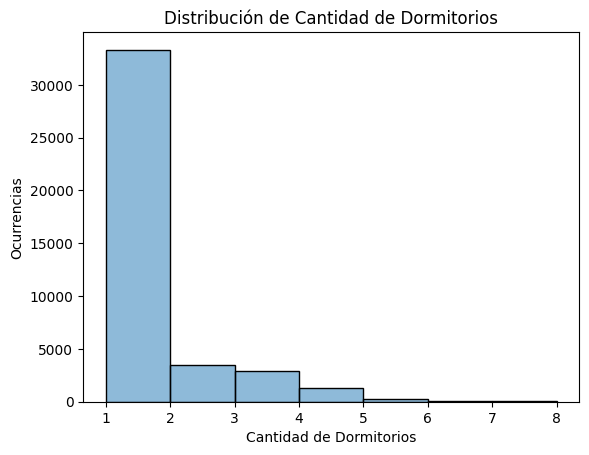

In [ ]:
sns_hist = sns.histplot(data=ds_properati['property_bedrooms'], alpha = 0.5, binwidth=1).set(title="Distribución de Cantidad de Dormitorios",xlabel="Cantidad de Dormitorios",ylabel="Ocurrencias")

In [ ]:
ds_properati.reset_index(inplace=True, drop=True)

#### Busqueda Valores Atípicos - Multivariado

Se grafica un pairplot de todas las variables que se tienen para dar un pantallazo general a la relación entre cada uno de los campos.

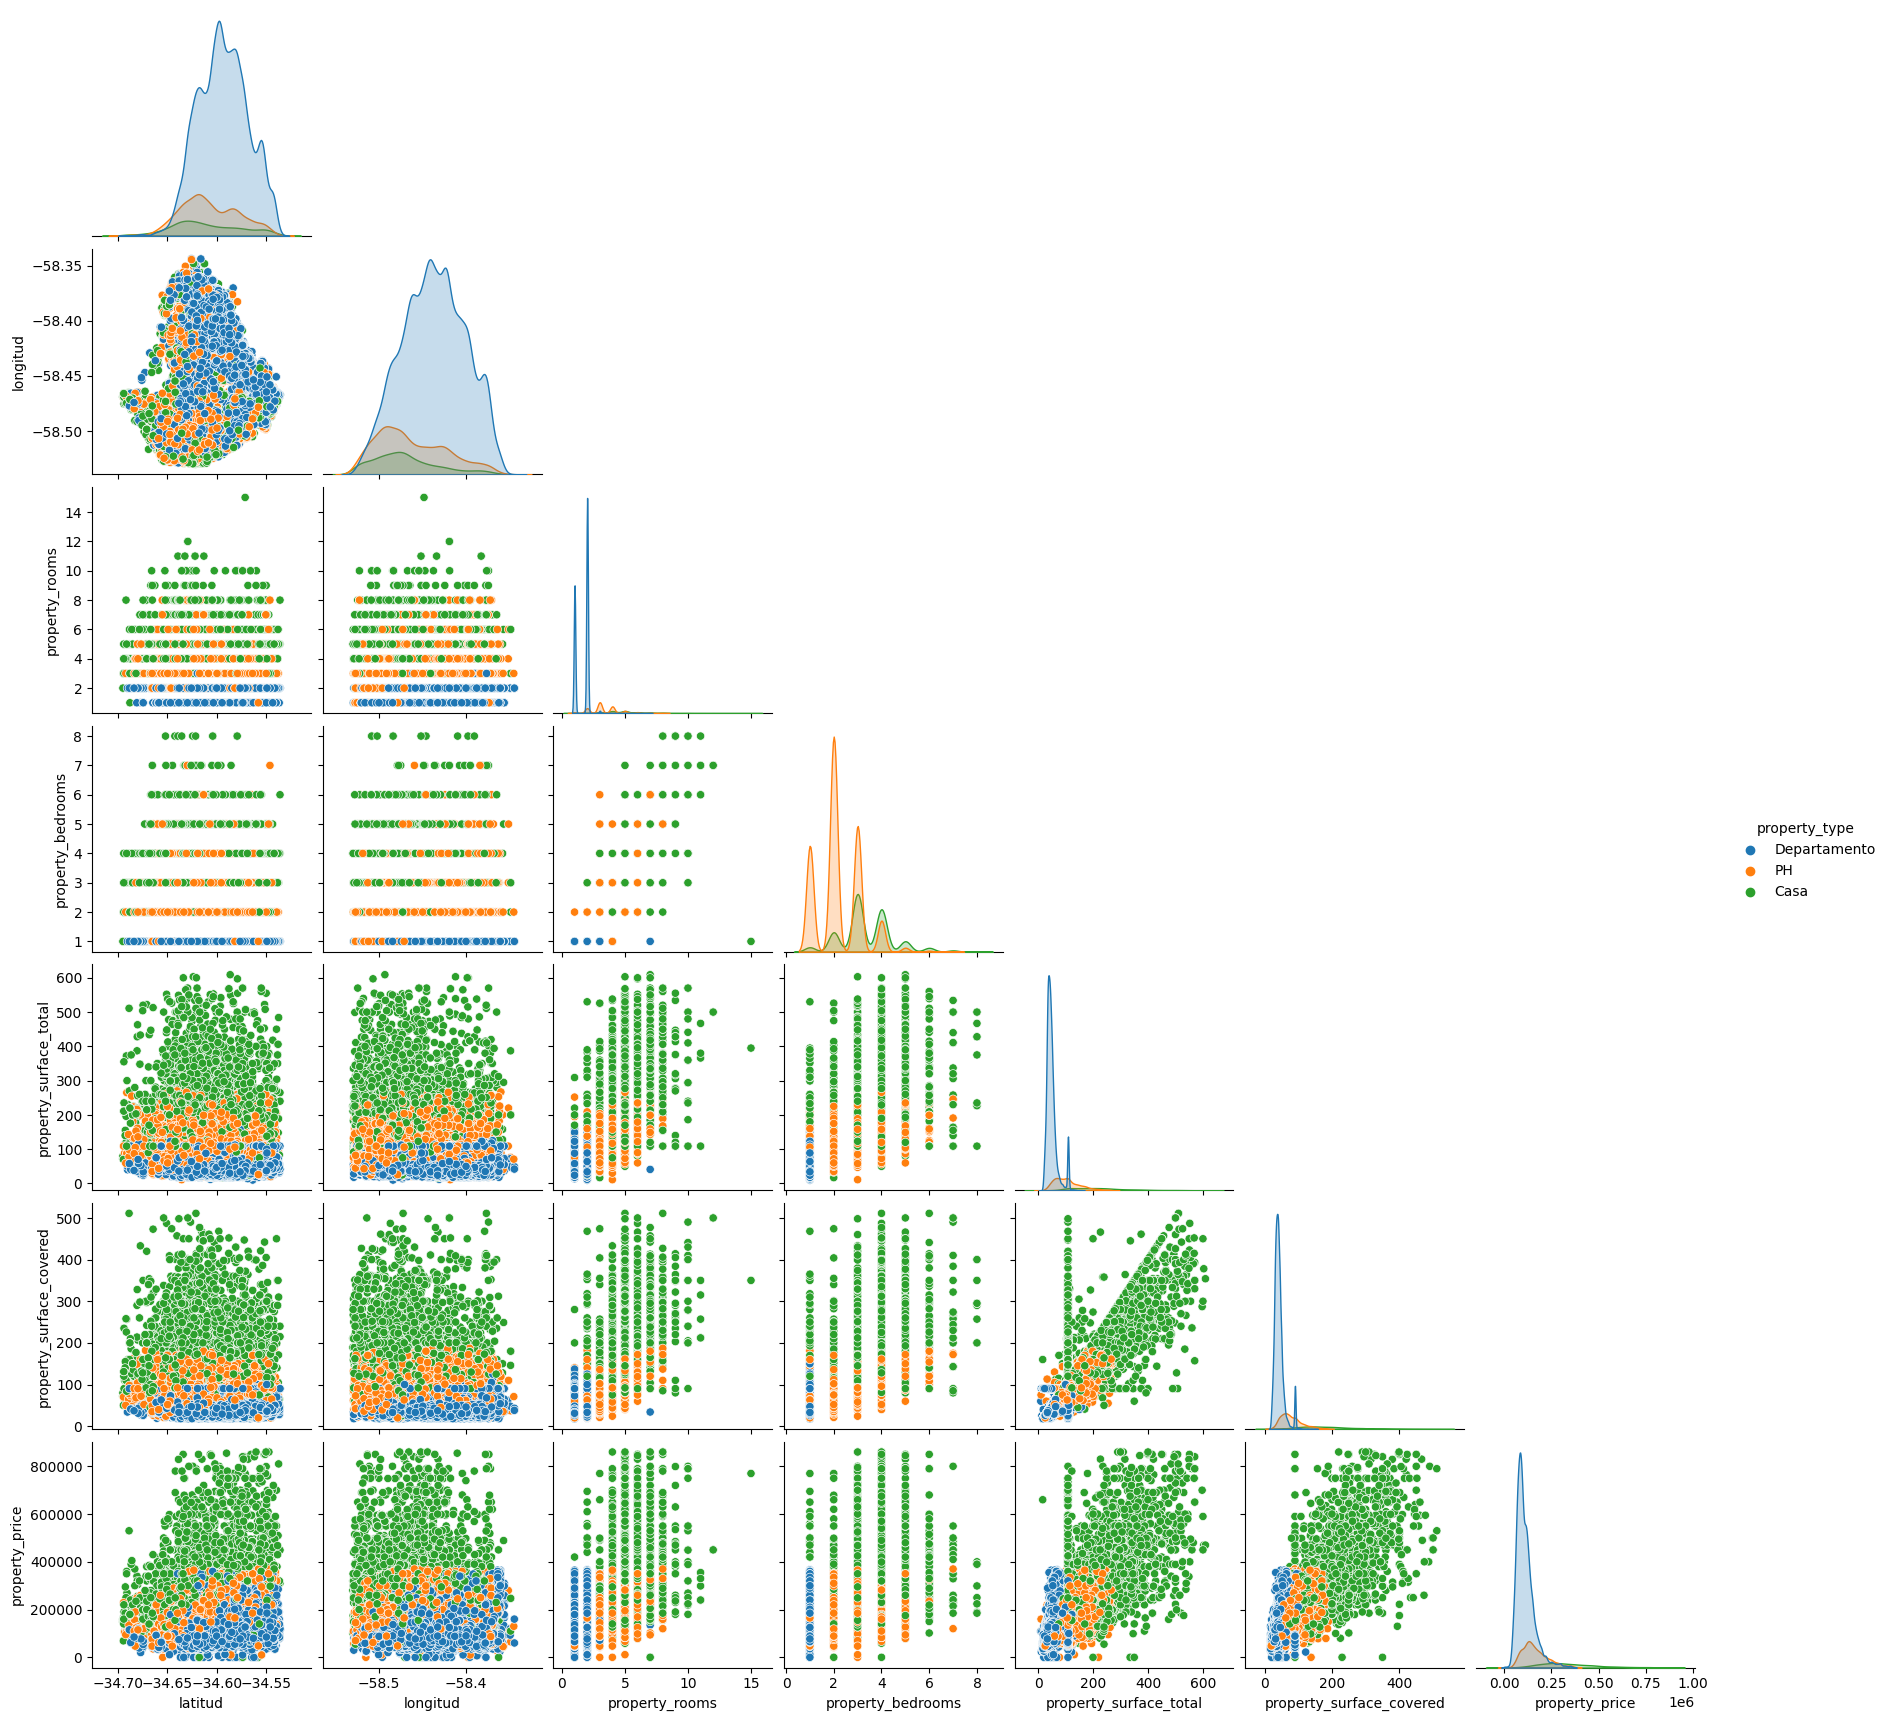

In [ ]:
sns.pairplot(ds_properati, hue="property_type", corner=True)

Se tratarán estos gráficos uno por uno de aquí en adelante.

##### Outliers relacionando la latitud y longitud

Haciendo el analisis de los datos faltantes pudimos identificar a la mayoría de los registros donde su latitud y longitud no correspondía con la Capital Federal y, como es de esperarse, la abrumadora mayoría de puntos se hallan conglomerados en un área.

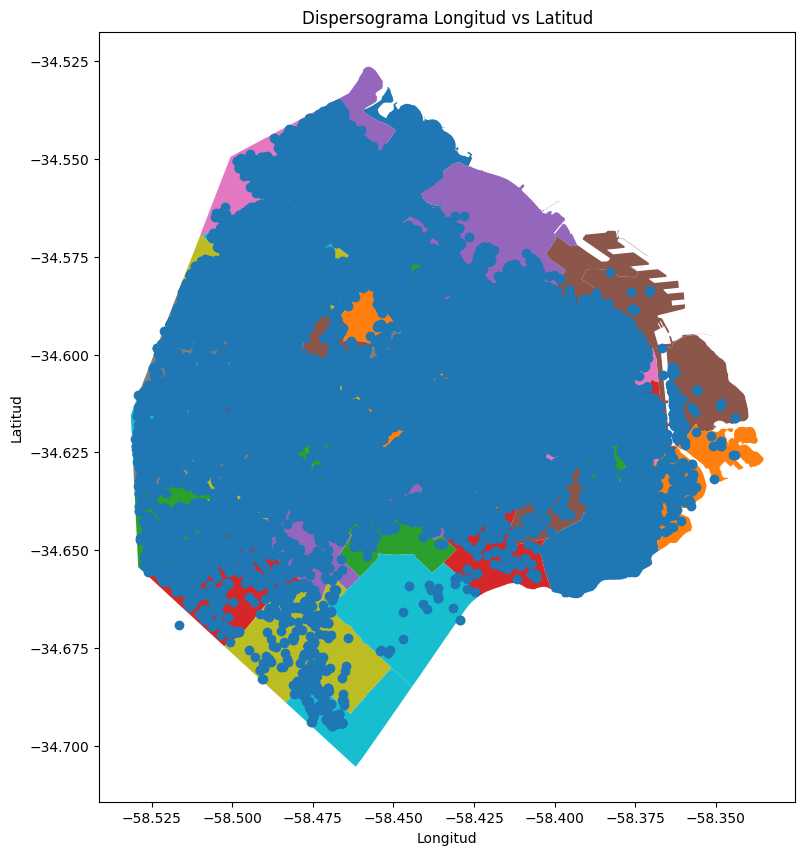

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

poligonos.plot(ax=ax,column='BARRIO')
plt.scatter(ds_properati.longitud, ds_properati.latitud)
plt.title('Dispersograma Longitud vs Latitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Se observan potenciales outliers por lo que vamos a analizarlos:

In [ ]:
points = gp.GeoDataFrame(ds_properati, geometry=gp.points_from_xy(ds_properati.longitud, ds_properati.latitud))

indices = []
for barrio in poligonos.BARRIO:
    b = poligonos[poligonos['BARRIO'] == barrio].index[0] #obtengo el indice del barrio en el df

    #creo un vector true/false si la propiedad está en el barrio (interseccion punto con poligono)
    mask = points.within(poligonos.loc[b, 'geometry']) 
    indices.append(points.loc[mask,"barrio"].index)


In [ ]:
import itertools
indices=list(itertools.chain(*indices))

In [ ]:
ds_properati = ds_properati.iloc[lambda fila: fila.index.isin(indices)]

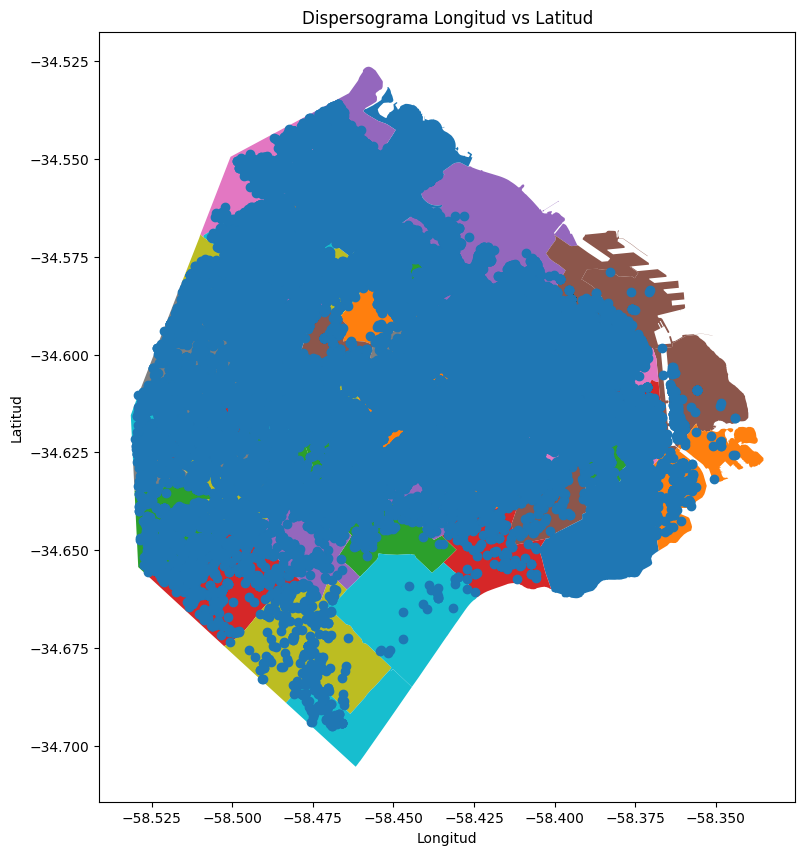

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

poligonos.plot(ax=ax,column='BARRIO')
plt.scatter(ds_properati.longitud, ds_properati.latitud)
plt.title('Dispersograma Longitud vs Latitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Finalmente removimos los outliers.

##### Outliers relacionando ambientes y dormitorios, superficie cubierta y superficie total

Para empezar, se eliminan aquellas entradas que tengan más dormitorios que ambientes (debido a que un dormitorio cuenta como un ambiente), y aquellas que tengan más superficie cubierta que total.

In [ ]:
ds_properati = ds_properati[ds_properati['property_bedrooms'] <= ds_properati['property_rooms']]
ds_properati = ds_properati[ds_properati['property_surface_covered'] <= ds_properati['property_surface_total']]

<AxesSubplot:xlabel='property_surface_total', ylabel='property_surface_covered'>

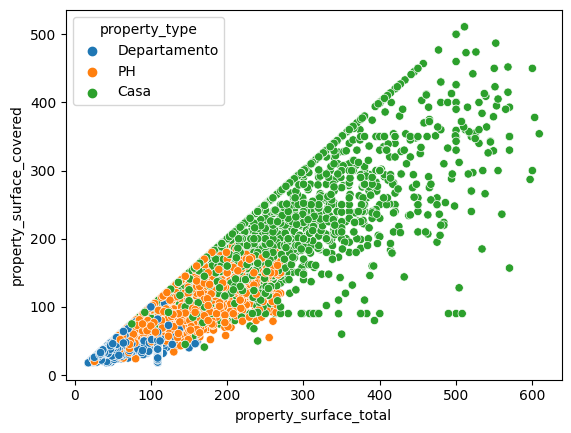

In [ ]:
sns.scatterplot(data=ds_properati, x="property_surface_total", y="property_surface_covered", hue="property_type")

Como se puede observar, a medida que aumenta la superficie de las propiedades en venta, las entradas comienzan a estar más dispersas, lo cual podría señalar la existencia de potenciales outliers. Sin embargo, aquellas propiedades que superan los 300 m² de superficie total son en su totalidad casas, por lo que valores de superficie cercanos a los 500 o 600 m² resultan factibles.

<AxesSubplot:xlabel='property_rooms', ylabel='property_bedrooms'>

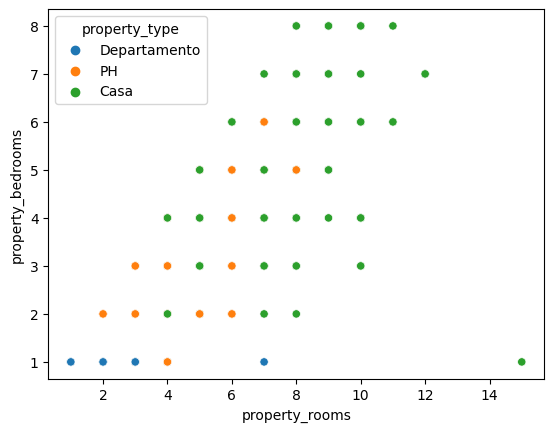

In [ ]:
sns.scatterplot(data=ds_properati, x="property_rooms", y="property_bedrooms", hue="property_type")

Se observa una buena distribución de datos, siendo las casas las que mayor cantidad de ambientes poseen en relación a la cantidad de dormitorios, y los departamentos los de menos.

##### Analisis de outliers relacionando la superficie total y el precio de la propiedad


<AxesSubplot:xlabel='property_surface_total', ylabel='property_price'>

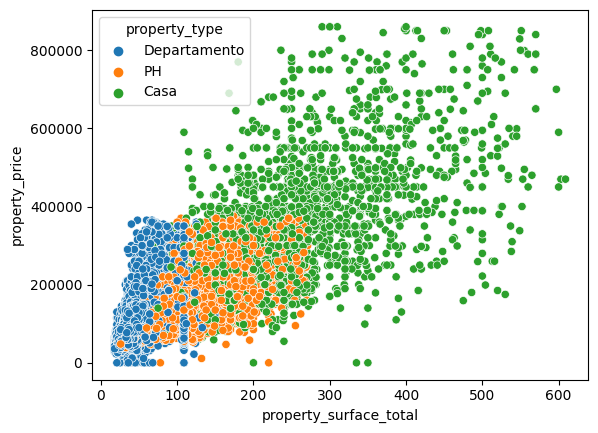

In [ ]:
sns.scatterplot(data=ds_properati, x="property_surface_total", y="property_price", hue="property_type")

Analizando outliers se observaron frecuentemente porpiedades con precio nulo, el criterio adoptado para las mismas es eliminarlas, ya que al tener precio nulo no aportan informacion de interes. Antes de proceder con la eliminacion de analiza el porcentaje de propiedades con precio nulo.

In [ ]:
propiedades_totales = len(ds_properati)
propiedades_con_precio_nulo = len(ds_properati[ds_properati["property_price"] == 0.0])

porcentaje_de_propiedades_con_precio_nulo = (propiedades_con_precio_nulo*100)/propiedades_totales
porcentaje_de_propiedades_con_precio_nulo

0.06038647342995169

El porcentaje de propiedades con precio nulo es muy bajo (0.06%), se decide que la mejor forma de tratar con estas propiedades es eliminarlas del dataset. Al ser pocas (comparadas con el resto) no son representativas y no aportan informacion relevante, por lo que su eliminacion no generaria algun problema a futuro.

In [ ]:
ds_properati.drop(ds_properati.loc[ds_properati["property_price"] == 0.0].index, inplace = True)

In [ ]:
display((ds_properati["property_price"] == 0.0).sum())
display(ds_properati["property_currency"].isna().sum())

0

0

Como se había visto en el análisis de valores faltantes de *property_currency*, nos quedaban con precio cero aquellas propiedades que no exponían moneda. Vemos que ya no quedan propiedades sin precio ni moneda.

Finalmente se aplica el algoritmo de Mahalanobis para tratar aquellas entradas que se alejan considerablemente del grueso de puntos.

<AxesSubplot:xlabel='property_surface_total', ylabel='property_price'>

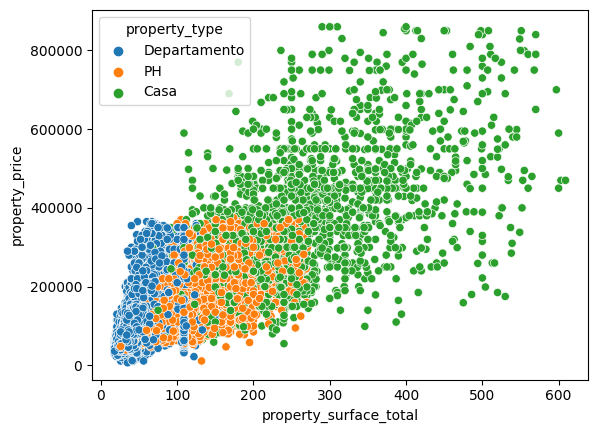

In [ ]:
sns.scatterplot(data=ds_properati, x="property_surface_total", y="property_price", hue="property_type")

Finalmente se obtiene un gráfico con una relación razonable de superficie a precio donde no hay valores los cuales resalten por su poca afinidad al resto de entradas.

##### Análisis de outliers relacionando la superficie total cubierta de una propiedad con los precios de la misma

<AxesSubplot:xlabel='property_surface_covered', ylabel='property_price'>

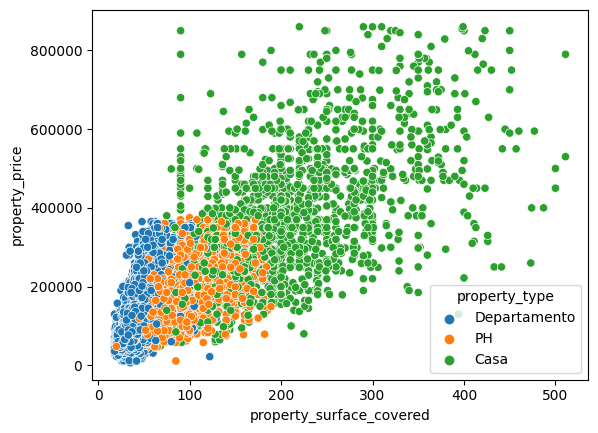

In [ ]:
sns.scatterplot(data=ds_properati, x="property_surface_covered", y="property_price", hue="property_type")

El gráfico obtenido es muy similar al de precio en función de la superficie total. Si bien hay valores que podrían llegar a ser potenciales outliers (como la casa de 800.000 USD y 100 m^2), al ser tan solo dos valores consideramos que no tendrán gran incidencia en los modelos obtenidos más adelante.

##### Análisis de outliers relacionando la cantidad de dormitorios y el precio de cada propiedad

<AxesSubplot:xlabel='property_bedrooms', ylabel='property_price'>

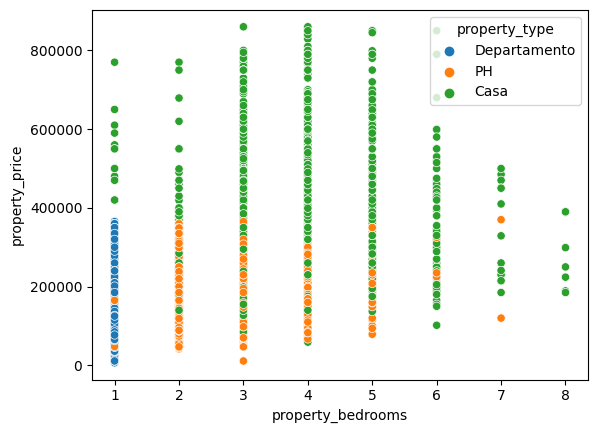

In [ ]:
sns.scatterplot(data=ds_properati, x="property_bedrooms", y="property_price", hue="property_type")

Para cada cantidad de dormitorios se observa una dispersion unforme y razonable de los puntos. Si bien se esperaría que la relación de dormitorios con precio sea lineal (a más dormitorios más precio), y esto es algo que parcialmente se estaría cumpliendo, ya que el valor más bajo de cada propiedad aumenta según crece la cantidad de dormitorios. De todas formas, hay que tener en cuenta que hay otras variables que pueden llegar a afectar el precio como son la ubicación de las propiedades, lo cual no está siendo considerado en este gráfico.

##### Análisis outliers relacionando la cantidad de ambientes con el precio de la propiedad

<AxesSubplot:xlabel='property_rooms', ylabel='property_price'>

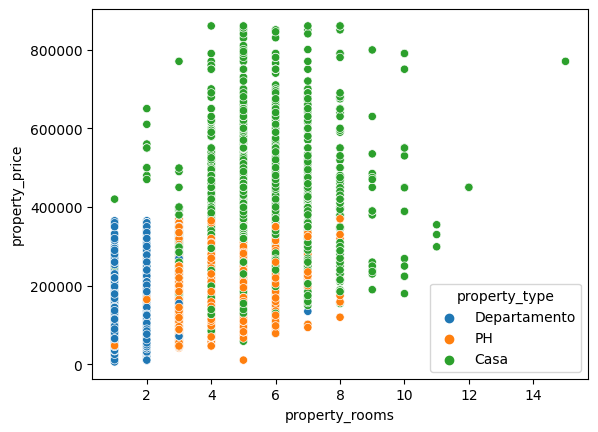

In [ ]:
sns.scatterplot(data=ds_properati, x="property_rooms", y="property_price", hue="property_type")

Para cada cantidad de ambientes se observa una dispersion uniforme y razonable de puntos.

##### Análisis latitud y precio

No resulta util para el analisis, no es representativo. Una misma latitud puede hacer referencia a varios barrios de la ciudad, por lo tanto el precio va a variar, habiendo outliers en un scatterplot. Sin embargo esto no quiere decir que sean outliers.

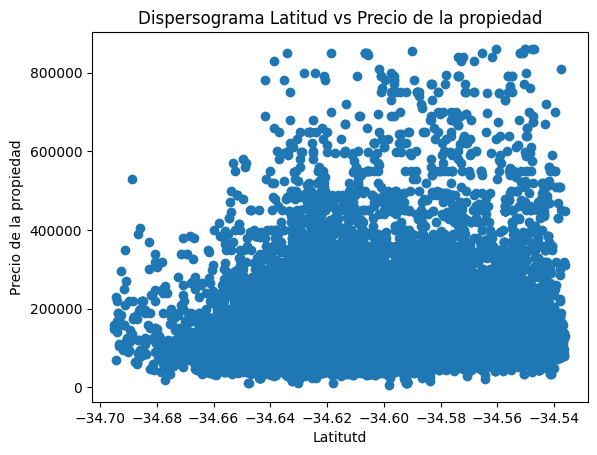

In [ ]:
plt.scatter(ds_properati.latitud, ds_properati.property_price)
plt.title('Dispersograma Latitud vs Precio de la propiedad')
plt.xlabel('Latitutd')
plt.ylabel('Precio de la propiedad')
plt.show()

##### Analisis de outliers relacionando la longitud con el precio de la propiedad

No resulta util para el analisis, no es representativo. Una misma longitud puede hacer referencia a varios barrios de la ciudad, por lo tanto el precio va a variar, habiendo outliers en un scatterplot. Sin embargo esto no quiere decir que sean outliers.

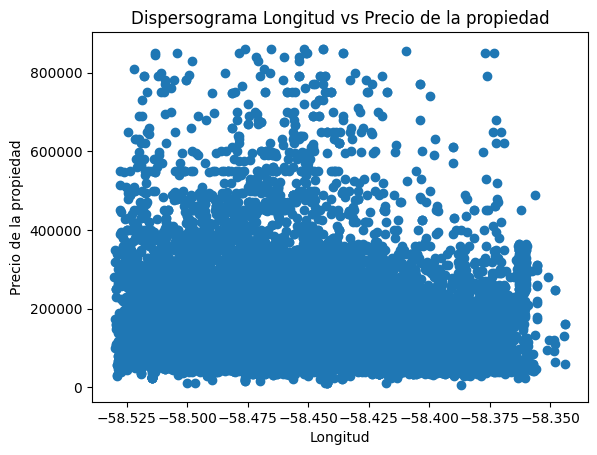

In [ ]:
plt.scatter(ds_properati.longitud, ds_properati.property_price)
plt.title('Dispersograma Longitud vs Precio de la propiedad')
plt.xlabel('Longitud')
plt.ylabel('Precio de la propiedad')
plt.show()

##### Análisis de outliers relacionando los dormitorios con la superficie cubierta

<AxesSubplot:xlabel='property_bedrooms', ylabel='property_surface_covered'>

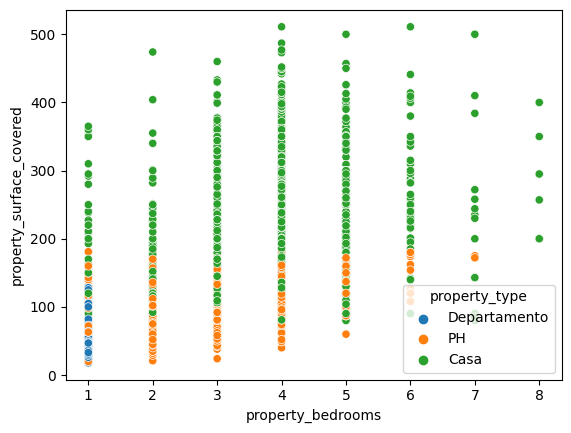

In [ ]:
sns.scatterplot(data=ds_properati, x="property_bedrooms", y="property_surface_covered", hue="property_type")

Nuevamente, se observa una buena distribución de las entradas, sin valores que llamen sobresalientemente la atención.

##### Análisis de outliers relacionando los ambientes con la superficie cubierta

<AxesSubplot:xlabel='property_rooms', ylabel='property_surface_covered'>

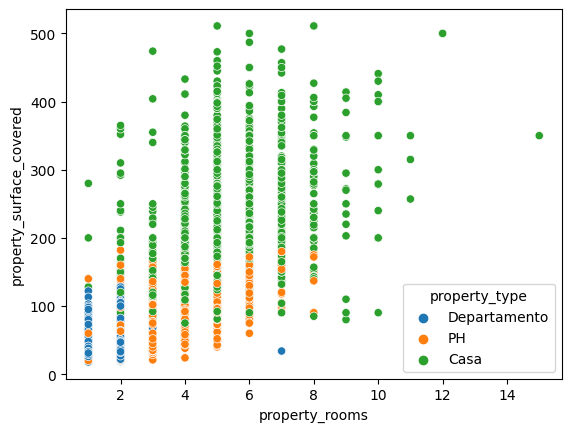

In [ ]:
sns.scatterplot(data=ds_properati, x="property_rooms", y="property_surface_covered", hue="property_type")

Nuevamente muy similar al caso de superficie cubierta por cantidad de dormitorios.

##### Análisis de outliers relacioando los dormitorios con la superficie total

<AxesSubplot:xlabel='property_bedrooms', ylabel='property_surface_total'>

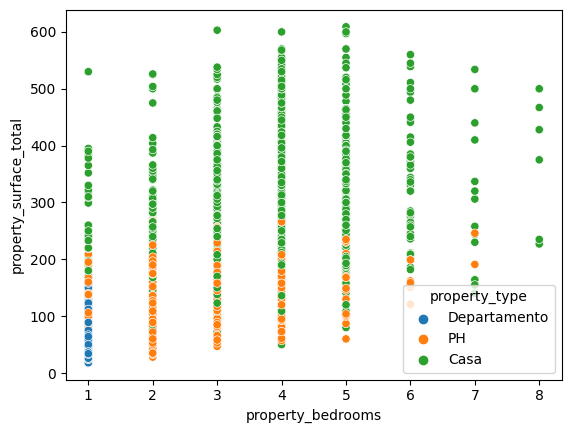

In [ ]:
sns.scatterplot(data=ds_properati, x="property_bedrooms", y="property_surface_total", hue="property_type")

##### Análisis de outliers relacionando las habitaciones con la superficie total

<AxesSubplot:xlabel='property_rooms', ylabel='property_surface_total'>

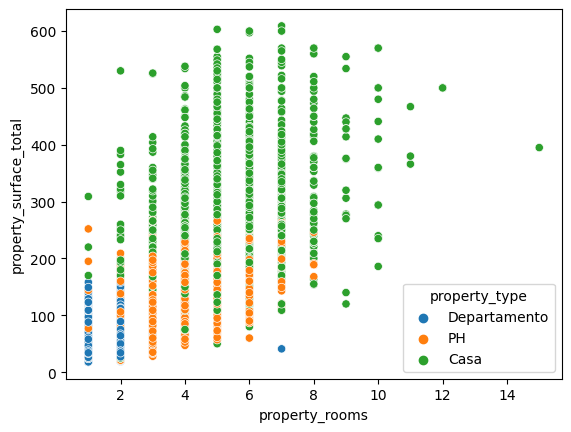

In [ ]:
sns.scatterplot(data=ds_properati, x="property_rooms", y="property_surface_total", hue="property_type")

Se observa una distribución muy similar a la de cantidad de dormitorios y ambientes por superficie cubierta, con unos pocos potenciales outliers que nuevamente no tendrán incidencia en el análisis futuro. 

#### Reducción de la dimensionalidad

Como podemos ver en el grafico de correlacion, las únicas dos categorias que se encuentran lo suficientemente correlacionadas para aplicarle el algoritmo de reduccion de la dimensionalidad son property_surface_covered, property_surface_total y property_rooms, property_bedrooms

<AxesSubplot:>

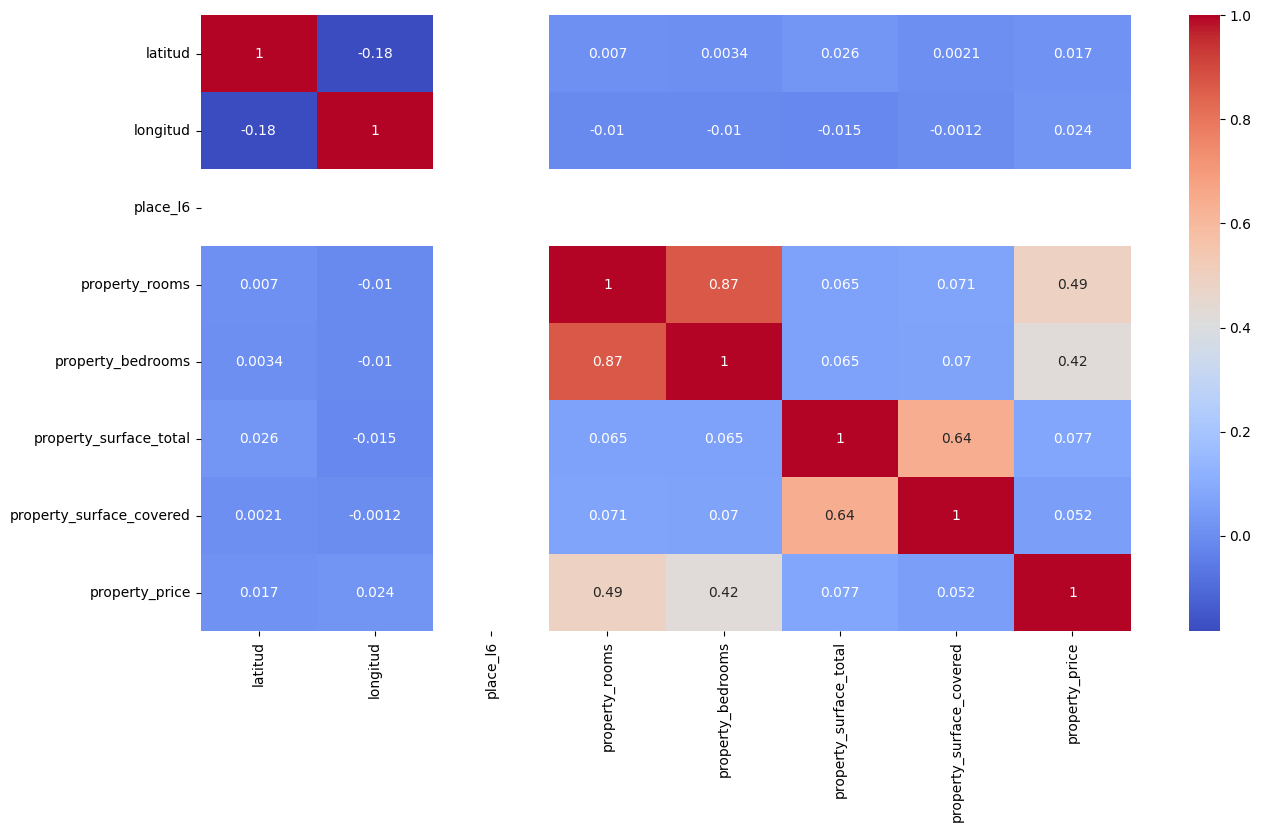

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(matriz_corr, annot = True, cmap='coolwarm')

Importamos las librerias a utilizar

In [ ]:
!pip install scikit-learn

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##### PCA
Procedimiento matemático por el cual se transforma un conjunto de variables correlacionadas en un conjunto de variables no correlacionadas de menor dimensión. Estas nuevas variables se obtiene a partir de combinaciones lineales de las variables originales.
Estas nuevas variables son las que se denominan Componentes Principales.

Esta técnica intenta hallar aquellas combinaciones lineales de las variables originales que maximizan la varianza (minimizan la pérdida de información original).

Esta técnica no requiere supuestos por lo que puede aplicarse siempre (pero tendrá sentido si las variables originales están correlacionadas).

El objetivo es reducir la dimensión del problema, es decir, descartar la información redundante.

PASOS:
- Normalizar los atributos
- Calcular la matriz de covarianza
- Calcular autovalores y autovectores
- Ordenar los autovalores por orden descendente para elegir las componentes a utilizar
- Ordenar los autovectores en función del orden de los autovalores y armar la matriz de transformación

Seleccionamos sólo las features de naturaleza numérica y hacemos un escalado para mejorar la performance del método

In [ ]:
ds_numerico = ds_properati.select_dtypes(include=np.number)
x = StandardScaler().fit_transform(ds_numerico)

ACA HAY Q SEPARAR EN TRAIN TEST

In [ ]:
x_pca = PCA(random_state=0)
x_pca.fit(x)

PCA(random_state=0)

In [ ]:
var_cumu = np.cumsum(x_pca.explained_variance_ratio_) * 100
k = np.argmax(var_cumu > 95)
print("El numero mínimo de componentes para explicar el 95% de la varianza es: " + str(k))

El numero mínimo de componentes para explicar el 95% de la varianza es: 4


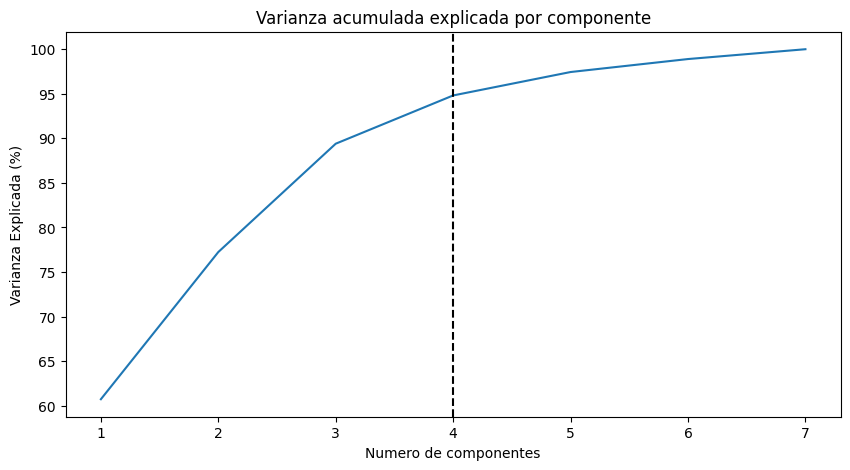

In [ ]:
plt.figure(figsize=[10, 5])
plt.title('Varianza acumulada explicada por componente')
componentes = len(x_pca.explained_variance_ratio_) 
plt.plot(range(1,componentes+1), np.cumsum(x_pca.explained_variance_ratio_ * 100))
plt.xlabel("Numero de componentes")
plt.ylabel("Varianza Explicada (%)")
plt.axvline(x=k, color="k", linestyle="--")

Obtengo un modelo entrenado.

In [ ]:
pca = PCA(n_components=k, random_state=0) 
x_transformada = pca.fit_transform(x)

In [ ]:
pca_df_aux = pd.DataFrame(data = x_transformada, columns = ['cp_1','cp_2','cp_3','cp_4'])
pca_df_aux

cp_1      cp_2      cp_3      cp_4
0     -1.203914  0.881887  0.291531  0.325384
1     -1.119905  0.938840 -0.127833  0.540375
2      1.197676 -1.093388 -1.369487 -0.376642
3     -0.255557  0.162555 -0.170112  0.423856
4     -0.331022 -1.525393  0.231167 -0.000901
...         ...       ...       ...       ...
39715 -0.795417 -0.670354  0.640727 -0.310349
39716 -0.143334 -1.695294  0.903231  0.049675
39717  9.434213 -2.172546  2.024399  3.516547
39718 -0.414437  1.155343  0.001793  0.389754
39719 -0.987555 -0.787710 -0.176511 -0.460559

[39720 rows x 4 columns]

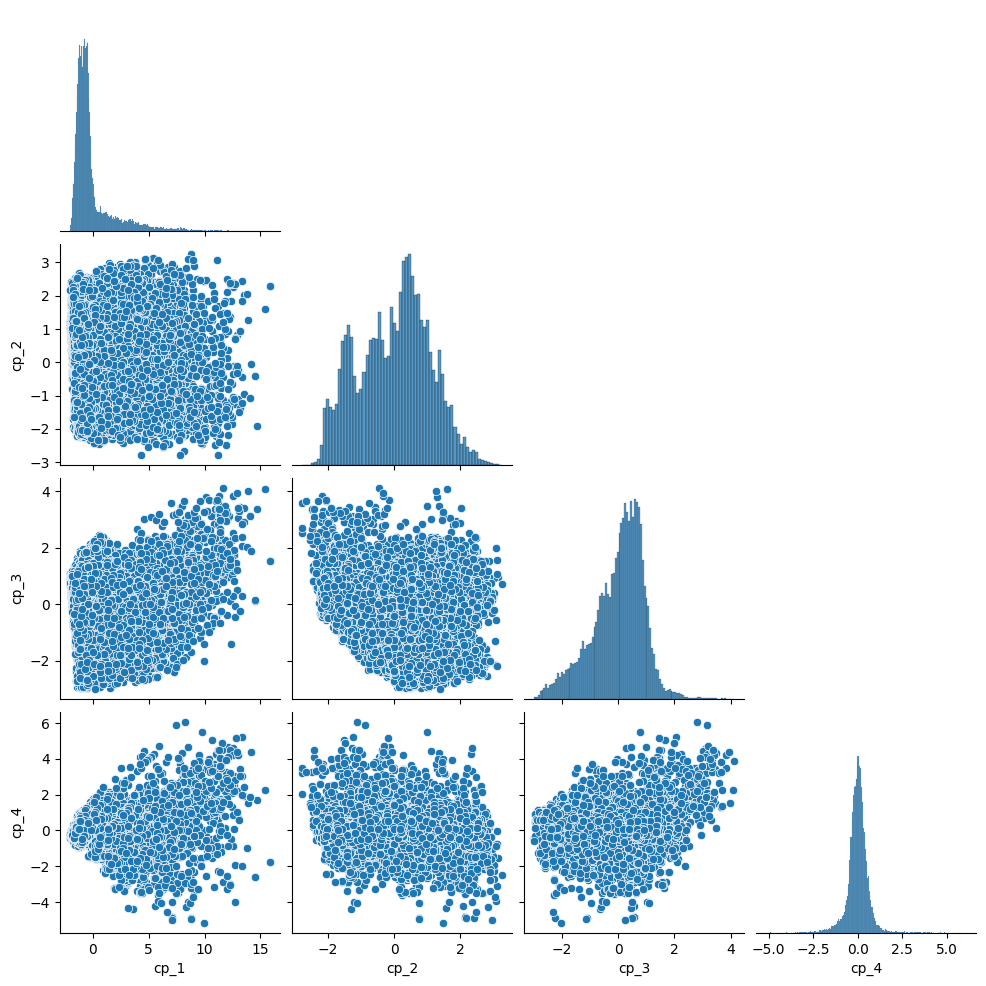

In [ ]:
sns.pairplot(pca_df_aux, corner=True)

Pasamos de tener 7 columnas (en ds_numerico) a sólo 4 con una varianza explicada del 95%.

Exportamos el data set resultante de la reducción de la dimensionalidad:

In [ ]:
pca_df_aux.to_csv("dataset_reducido.csv")

Exportamos el último data set para usarlo durante el otro tramo del TP


In [ ]:
ds_properati.to_csv("nuevo_dataset_properati.csv")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fcb02109-3268-4805-81b4-1fba96795907' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>